# EDA for Lending Club Case Study

## Business Objective : 
Identify risky loan applicants,who have higher chances of being Defaulters so that such loans can be reduced thereby cutting down the amount of credit loss. 
Identification of driving factors or attributes of such applicants based on the available dataset using EDA is the aim of this case study.

In [222]:
## importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings
warnings.filterwarnings('ignore')

### Our analysis is based on the below data
Dataset Used : Loan Data Set (with records of issued loans from 2007 to 2011)

Data Dictionary Used : https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fcdn.upgrad.com%2FUpGrad%2Ftemp%2Faf860da6-f838-47d6-ad97-551022550ee4%2FData_Dictionary.xlsx&wdOrigin=BROWSELINK

In [223]:
#loading the data
loan = pd.read_csv("loan.csv")

## Data Understanding

In [224]:
#displaying the top 5 rows of the data to view the kind of data we have
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [225]:
#checking the shape of the data
loan.shape

(39717, 111)

In [226]:
#checking the kind of data in the columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Missing Value Check

In [227]:
100*loan.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [228]:
# As observed there are a lot of columns with 100% null values, so dropping those columns as they wont add any value to the analysis
loan.dropna(axis = 1, how = 'all', inplace = True)

In [229]:
#checking the same after dropping above columns
loan.shape

(39717, 57)

In [230]:
#checking the number of unique values in each column
for i in loan.columns:
    print(i, loan[i].nunique())

id 39717
member_id 39717
loan_amnt 885
funded_amnt 1041
funded_amnt_inv 8205
term 2
int_rate 371
installment 15383
grade 7
sub_grade 35
emp_title 28820
emp_length 11
home_ownership 5
annual_inc 5318
verification_status 3
issue_d 55
loan_status 3
pymnt_plan 1
url 39717
desc 26527
purpose 14
title 19615
zip_code 823
addr_state 50
dti 2868
delinq_2yrs 11
earliest_cr_line 526
inq_last_6mths 9
mths_since_last_delinq 95
mths_since_last_record 111
open_acc 40
pub_rec 5
revol_bal 21711
revol_util 1089
total_acc 82
initial_list_status 1
out_prncp 1137
out_prncp_inv 1138
total_pymnt 37850
total_pymnt_inv 37518
total_rec_prncp 7976
total_rec_int 35148
total_rec_late_fee 1356
recoveries 4040
collection_recovery_fee 2616
last_pymnt_d 101
last_pymnt_amnt 34930
next_pymnt_d 2
last_credit_pull_d 106
collections_12_mths_ex_med 1
policy_code 1
application_type 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
pub_rec_bankruptcies 3
tax_liens 1


In [231]:
# checking the columns having single/low unique values
for i in ['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','application_type','pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt']:
    print(i, loan[i].unique(), loan[i].value_counts())

pymnt_plan ['n'] n    39717
Name: pymnt_plan, dtype: int64
initial_list_status ['f'] f    39717
Name: initial_list_status, dtype: int64
collections_12_mths_ex_med [ 0. nan] 0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
policy_code [1] 1    39717
Name: policy_code, dtype: int64
acc_now_delinq [0] 0    39717
Name: acc_now_delinq, dtype: int64
chargeoff_within_12_mths [ 0. nan] 0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
application_type ['INDIVIDUAL'] INDIVIDUAL    39717
Name: application_type, dtype: int64
pub_rec_bankruptcies [ 0.  1.  2. nan] 0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64
tax_liens [ 0. nan] 0.0    39678
Name: tax_liens, dtype: int64
delinq_amnt [0] 0    39717
Name: delinq_amnt, dtype: int64


In [232]:
#dropping these above columns as they are single valued or have high nan values

loan.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)


In [233]:
#dropping columns that are unique/descriptive for applicants and wont have any relation to the analysis
 
loan.drop(["id", "member_id", "url","desc","title","emp_title"], axis = 1, inplace = True)

In [234]:
loan[['addr_state','zip_code']].value_counts()
# zip_code & addr_state might have played a role in deciding the risk but based on the data available, there seems no accurate relation can be linked
# hence dropping these columns
loan.drop(["zip_code","addr_state"], axis = 1, inplace = True)

In [235]:
#checking distribution of data for all continuous columns
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,...,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,...,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,...,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,...,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,...,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,...,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


In [236]:
#dropping columns where 25 & 75 percentile data is 0 or 1 , as imputing them with mean,median or mode will also result in 0
loan.drop(["out_prncp_inv", "delinq_2yrs", "out_prncp", "total_rec_late_fee","inq_last_6mths", "recoveries", "collection_recovery_fee","pub_rec"], axis = 1, inplace = True)

In [237]:
# displaying list of all columns
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [238]:
## Based on the data description available for the columns, out of the 32 columns above , there are few columns that have values corresponding post loan approval. Since our aim is to figure out the driving factors for loan approval or rejection so some of these post approval data columns wont add value to our analysis. Hence will be removing these columns
# Dropping funded_amnt as the loan_amnt is the amount applied by applicant & funded_amnt _inv is the actual amount funded to the borrower, so funded_amnt won't have direct correlation to the analysis
loan.drop(["last_credit_pull_d", "total_pymnt_inv", "revol_bal", "total_pymnt", "total_rec_prncp", "total_rec_int", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record","funded_amnt"], axis = 1, inplace = True)

In [239]:
loan.shape

(39717, 19)

## Data Cleaning & Manipulation

### Checking missing values in the columns

In [240]:
100*loan.isnull().mean()

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
open_acc               0.000000
revol_util             0.125891
total_acc              0.000000
dtype: float64

In [241]:
# As per above 'emp_length' & 'revol_util' columns have some missing values

# Analysing 'emp_length' column

print(loan['emp_length'].unique())
print(loan['emp_length'].value_counts())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [242]:
# imputing the nan values in 'emp_length' column with mode
loan['emp_length'] = np.where(loan['emp_length'].isna(), loan['emp_length'].mode()[0] , loan['emp_length'])

In [243]:
# Analysing 'revol_util' column

print(loan['revol_util'].unique())
print(loan['revol_util'].value_counts())

['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64


In [244]:
# imputing the nan values in 'revol_util' column with mode
loan['revol_util'] = np.where(loan['revol_util'].isnull() , loan['revol_util'].mode()[0] , loan['revol_util'])

### Formatting & Standardizing the data in columns

In [245]:
# Checking type of data in the columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           39717 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  earliest_cr_line     39717 non-null 

#### As per the data dictionary provided 'int_rate','revol_util','emp_length' columns have countinuous data but are currently in Object dtype.
#### Thus, analysing and formatting the data for these columns


In [246]:
# Checking values of int_rate column
loan['int_rate'].values


array(['10.65%', '15.27%', '15.96%', ..., '8.07%', '7.43%', '13.75%'],
      dtype=object)

In [247]:
# Converting column int_rate to float
loan['int_rate'] = loan['int_rate'].apply(lambda x : float(x.strip('%'))) 

In [248]:
# as checked earlier 'revol_util' also has '%' values so converting it to float
loan['revol_util'] = loan['revol_util'].astype(str) #converting revol_util column to string datatype
loan['revol_util'] = loan['revol_util'].apply(lambda x : float(x.strip('%')))

In [249]:
# as checked earlier 'emp_length' also has '<',"+","years" values so standardizing & converting it to float
loan['emp_length'] = loan['emp_length'].astype(str) #converting emp_length column to string datatype

#writing a function to convert emp_length column to int by removing '<','+','years'

def getDigitFromString(a):
    digit = ''.join(filter(lambda x: x.isdigit(), a))
    return int(digit)

#applying above function to convert emp_length column to int:
loan['emp_length'] = loan['emp_length'].apply(getDigitFromString)

In [250]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,3,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,3,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,10,21.0,37
4,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,15,53.9,38


### As our goal is to identify the customers who are likely to default based on the given parameters or variables, so we will restrict our data set to only 'Fully Paid' and 'Charged Off' loan status as 'Current' loan status cases are not quite relevant for our analysis

In [251]:
# removing 'Current' loan status from the data set
loan = loan[loan['loan_status'] != 'Current']

In [252]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  float64
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           38577 non-null  int64  
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [253]:
# segmentation of continuous, categorical & date columns
cont_cols = ['loan_amnt','funded_amnt_inv','installment','annual_inc','dti','open_acc','total_acc','int_rate','emp_length','revol_util']
cat_cols = ["term","grade","sub_grade","home_ownership","verification_status","loan_status","purpose"]
date_cols = ["issue_d","earliest_cr_line"]
len(cont_cols)+len(cat_cols)+len(date_cols) #checking if all columns are accounted for

19

### Checking outliers for continuous columns

loan_amnt


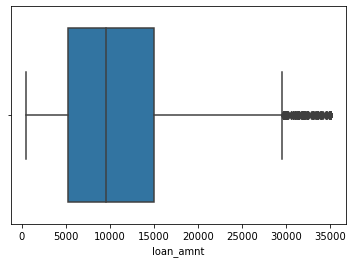

funded_amnt_inv


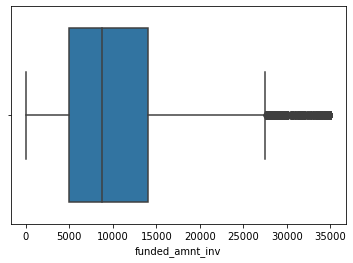

installment


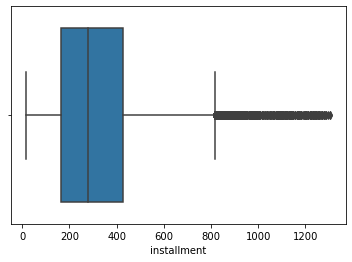

annual_inc


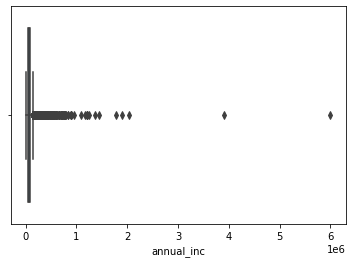

dti


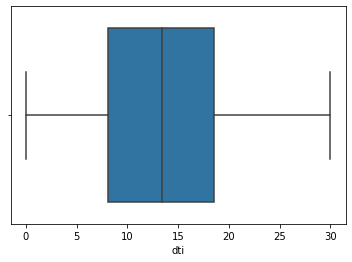

open_acc


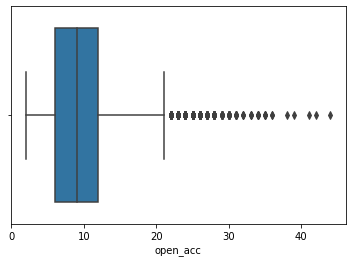

total_acc


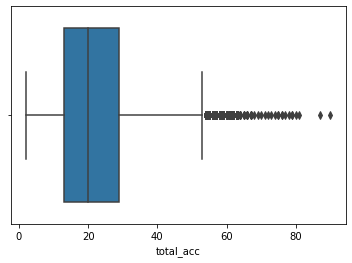

int_rate


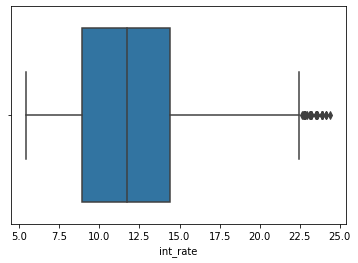

emp_length


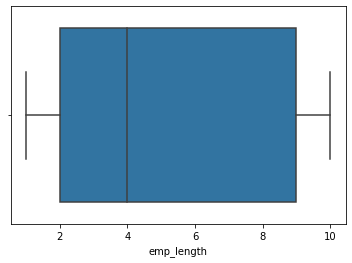

revol_util


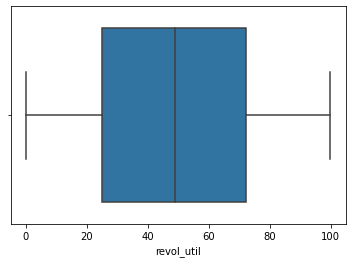

In [254]:
# checking loan_amnt column
for i in cont_cols:
    sns.boxplot(loan[i])
    print(i)
    plt.show()

In [255]:
# As per the plots obtained above most of the outliers are quite continuous from the upper fence, so will be excluding the treatment of those ones

# For 'annual_inc' there are wide range of outliers and this column is crucial in understanding the risk , so will be treating these outliers
loan["annual_inc"].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [256]:
annual_inc_q3 = 82000.000000
annual_inc_q1 = 40000.000000
annual_inc_IQR = annual_inc_q3 - annual_inc_q1
annual_inc_UB = annual_inc_q3 + 1.5*annual_inc_IQR

In [257]:
loan['annual_inc'] = np.where(loan['annual_inc'] > annual_inc_q3, annual_inc_UB , loan['annual_inc'])

<AxesSubplot:>

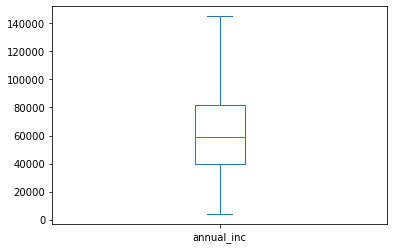

In [258]:
loan['annual_inc'].plot.box()

### Analysing data for categorical variables

In [259]:
# listing the distribution of values for categorical columns
for i in cat_cols:
    print(i)
    print(loan[i].value_counts())

term
 36 months    29096
 60 months     9481
Name: term, dtype: int64
grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64
sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64
home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64
loan_status
Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64
purpose
debt_consolidation    18055

In [260]:
# As from the abouve data we can understand that 'grade' and 'sub_grade' columns are related so we will format sub_grade column to include only int values 
loan['sub_grade'] = loan['sub_grade'].apply(lambda x : int(x[1]))

In [261]:
#displaying sub_grade column values
loan['sub_grade'].value_counts()

4    8063
3    7974
5    7847
2    7650
1    7043
Name: sub_grade, dtype: int64

In [262]:
# checking home_ownership column for NONE values as according to data dictionary values are expected to be RENT, MORTGAGE,OWN & OTHER
loan[loan['home_ownership'] == 'NONE']

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,revol_util,total_acc
39318,10000,1228.06,36 months,7.75,312.22,A,3,5,NONE,22200.0,Not Verified,Jan-08,Fully Paid,debt_consolidation,5.24,Apr-94,9,8.7,22
39659,4000,1925.00,36 months,9.64,128.41,B,4,1,NONE,145000.0,Not Verified,Aug-07,Fully Paid,other,15.00,May-99,6,14.9,8
39660,2800,1625.00,36 months,8.70,88.65,B,1,1,NONE,145000.0,Not Verified,Aug-07,Fully Paid,other,15.00,May-99,6,14.9,8


In [263]:
## Since home_ownership data is not available for these rows we will impute it as OTHER.
loan['home_ownership'] = np.where(loan['home_ownership'] == 'NONE', 'OTHER', loan['home_ownership'])

### Analysing data for Date columns

In [264]:
for i in date_cols:
    print(i , loan[i].value_counts())

issue_d Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64
earliest_cr_line Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08    

In [265]:
# As we have continuous records in the issue_d column for months atrting 2007 till 2011. Formatting the issue_d column for further analysis

loan['issue_d'] = loan['issue_d'].apply(lambda x : x.split('-'))


In [266]:
# adding a new columns for issue month & issue year
loan['issue_mnth'] = loan['issue_d'].apply(lambda x : x[0])
loan['issue_year'] = loan['issue_d'].apply(lambda x : int('20'+ x[1]))

In [267]:
# Similarly formatting the earliest_cr_line column for further analysis
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x : x.split('-'))

# adding a new columns for earliest_cr_line month & earliest_cr_line year
loan['earliest_cr_line_mnth'] = loan['earliest_cr_line'].apply(lambda x : x[0])
loan['earliest_cr_line_yr'] = loan['earliest_cr_line'].apply(lambda x : int('20'+ x[1]) if int(x[1]) <= 11 else int('19'+ x[1]))

## Univariate Analysis

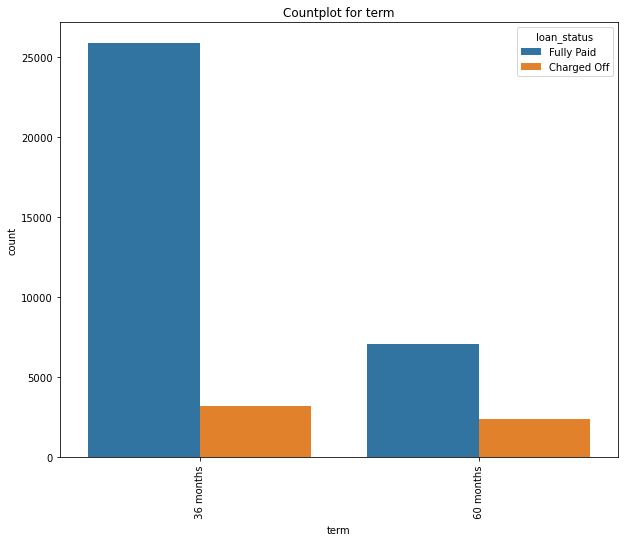

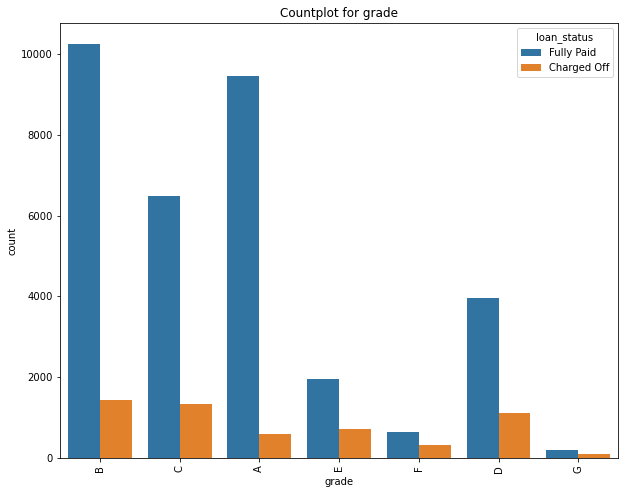

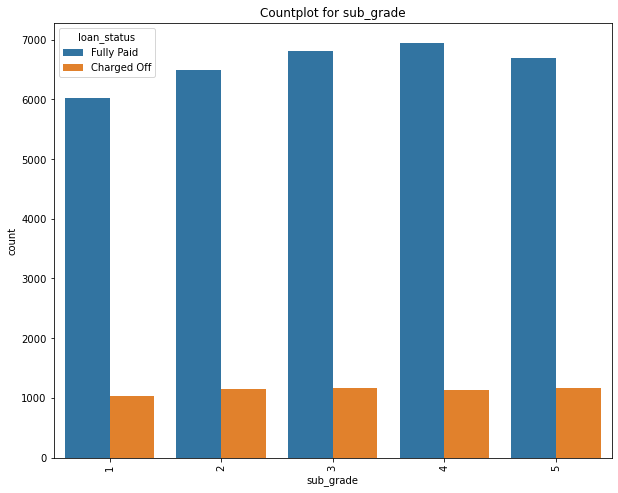

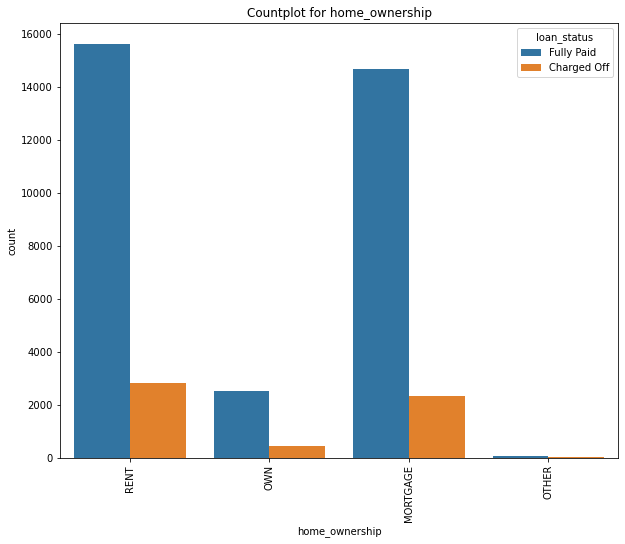

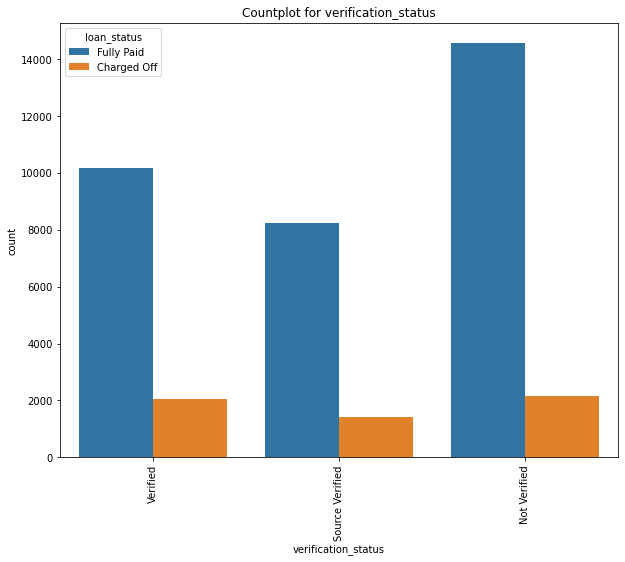

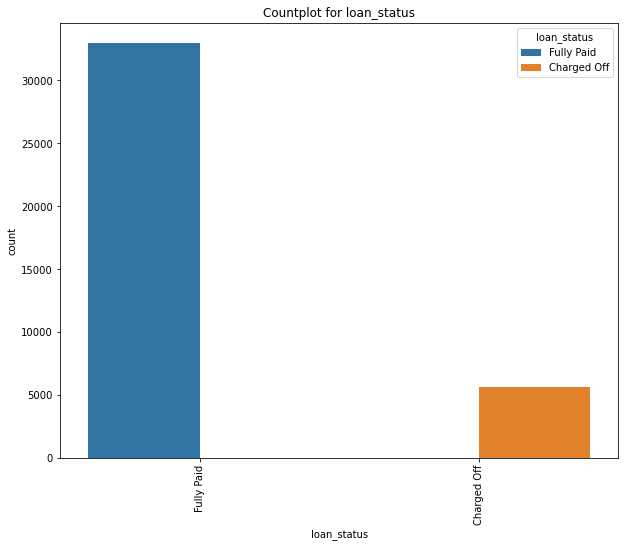

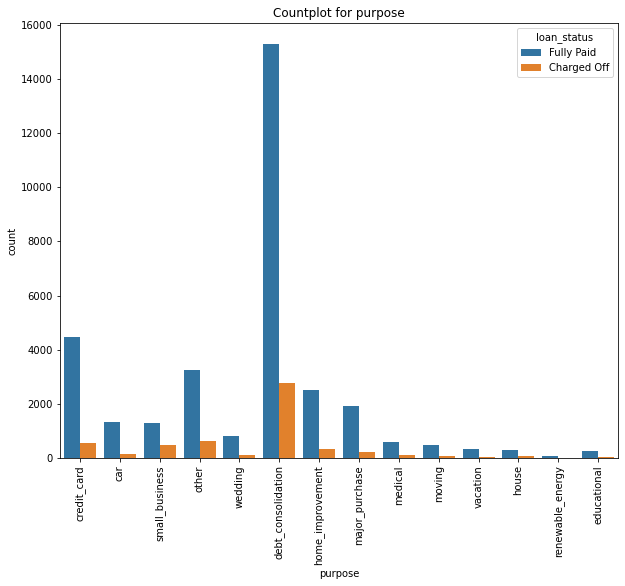

In [268]:
# Plotting countplots for all categorical columns
for i in cat_cols:
    plt.figure(figsize = (10,8))
    sns.countplot(loan[i], hue = loan['loan_status'] )
    plt.title("Countplot for "+i)
    plt.xticks(rotation=90)
    plt.show()
    
    

## Insights : As we can view from the above plots
1. term : The data corresponding to loan tenure of 36 months is almost double of that for 60 months
2. grade : Grades 'B','A' & 'C' are highest respectively follwed by 'D', whereas 'F' and 'G' account for very minor portion of the data
3. home_ownership : Maximum Charged Off correspond to MORTGAGE & RENT(though looking at the graph MORTGAGE chargedoff percentile seems higher
4. verification_status: Most of the loan approved falls under Not_Verifed category, whereas verified and source_verifed are quite close in numbers
5. loan_status: Most of the records correspond to Fully Paid status while we have around only 5k records for Charged Off
6. purpose : debt_consolidation appears to be the main purpose for the applicants, also charged off is higher 

In [269]:
for i in cont_cols:
    print(i , loan[i].describe())

loan_amnt count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
funded_amnt_inv count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64
installment count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64
annual_inc count     38577.000000
mean      73259.515737
std       43859.533743
min        4000.000000
25%       40000.000000
50%       58868.000000
75%       82000.000000
max      145000.000000
Name: annual_inc, dtype: float64
dti count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%       

In [270]:
#Since we have a wide range of data available for continuous columns , so will apply the binning of data for better revelation and insights
# emp_length column is already in a range of 0 to 10 so will not bin it further

loan['annual_inc_buckets'] = pd.cut(loan['annual_inc'], bins=[0,25000,50000,75000,100000,125000,150000])
loan['loan_amnt_buckets'] = pd.cut(loan['loan_amnt'], bins=[0,5000,10000,15000,20000,25000,30000,35000])
loan['funded_amnt_inv_buckets'] = pd.cut(loan['funded_amnt_inv'], bins=[0,5000,10000,15000,20000,25000,30000,35000])
loan['installment_buckets'] = pd.cut(loan['installment'], bins=[0,150,300,450,600,750,900,1050,1200,1350])
loan['int_rate_buckets'] = pd.cut(loan['int_rate'], bins=[0,5,10,15,20,25])
loan['open_acc_buckets'] = pd.cut(loan['open_acc'], bins=[1,10,20,30,40,50])
loan['revol_util_buckets'] = pd.cut(loan['revol_util'], bins=[0,20,40,60,80,100])
loan['total_acc_buckets'] = pd.cut(loan['total_acc'], bins=[0,20,40,60,80,100])
loan['dti_buckets'] = pd.cut(loan['dti'], bins=[0,5,10,15,20,25,30])


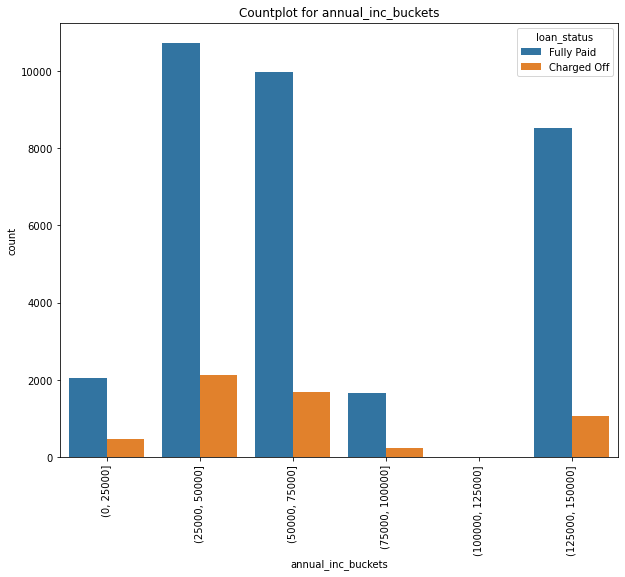

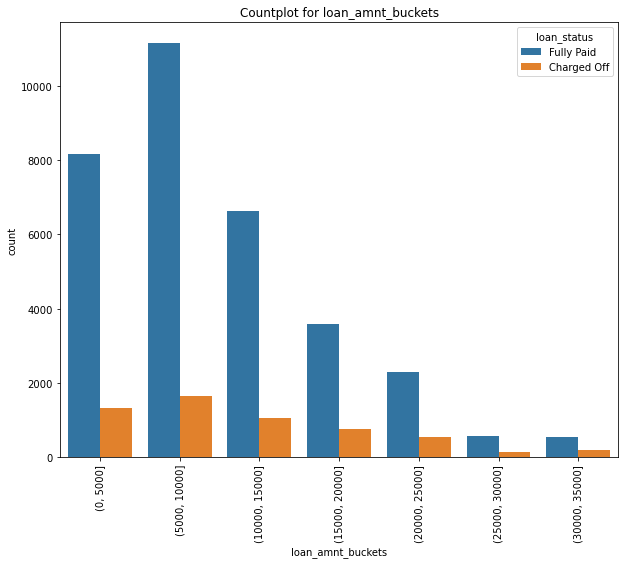

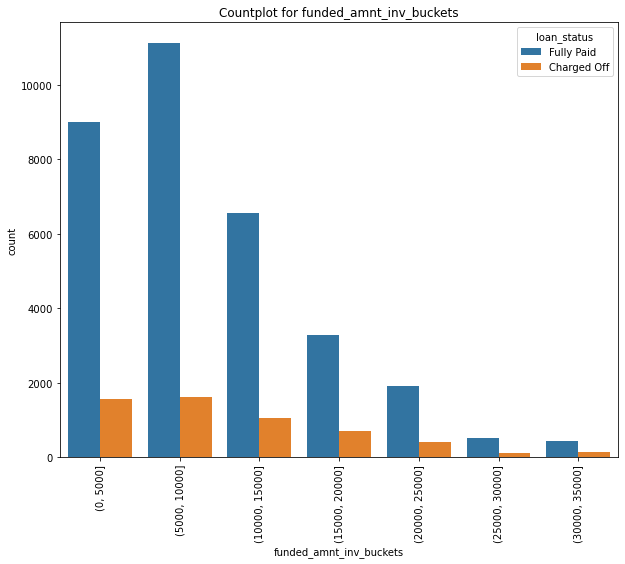

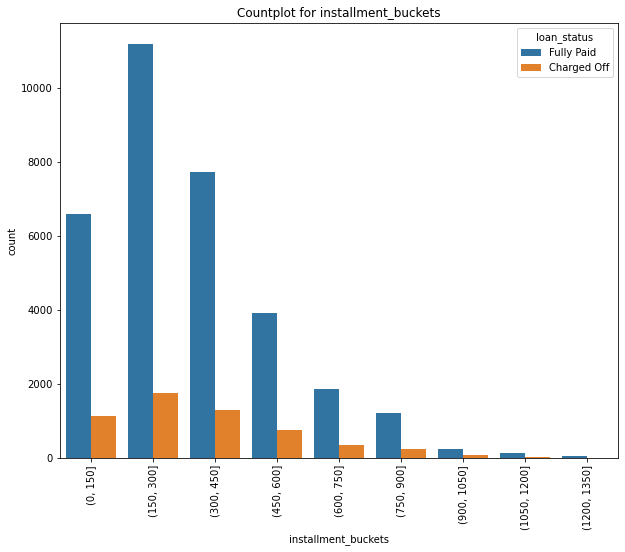

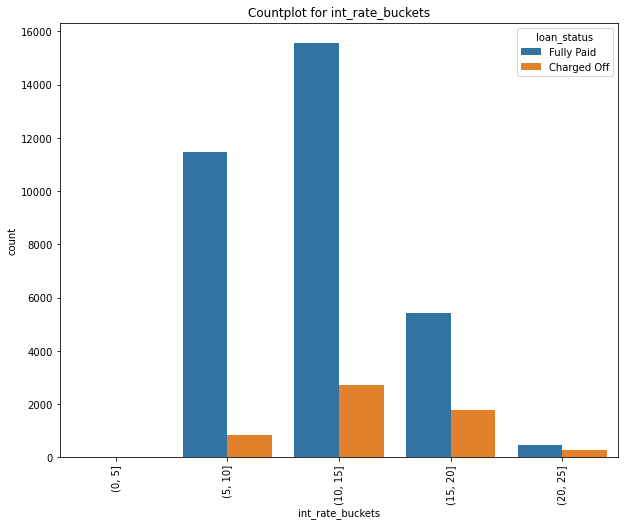

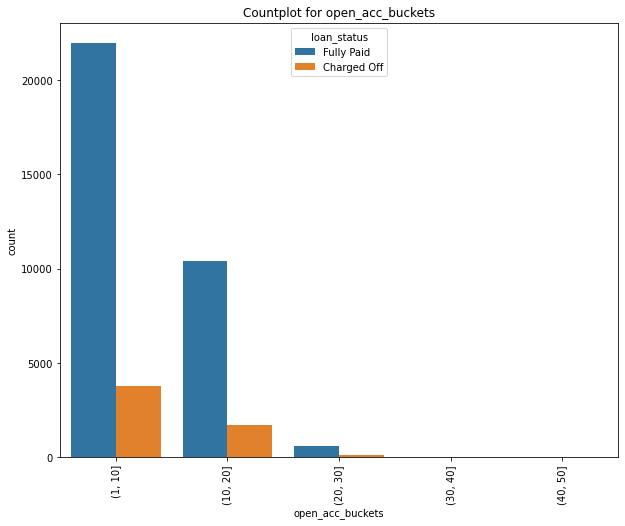

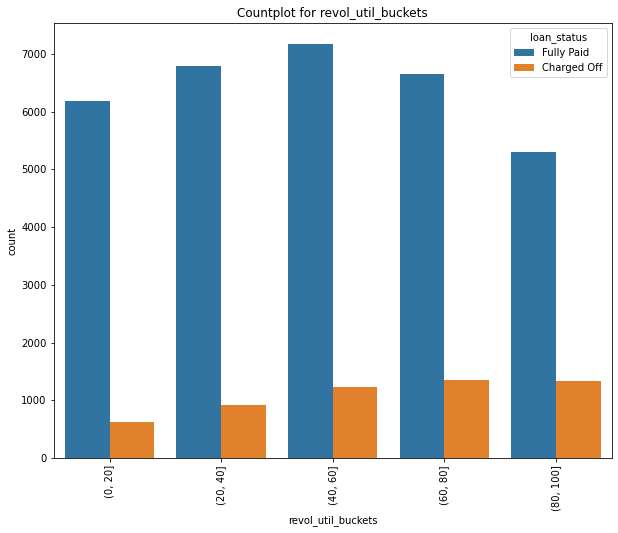

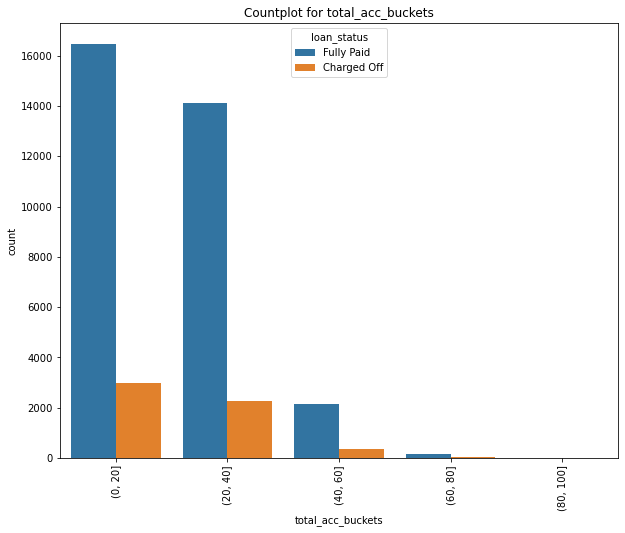

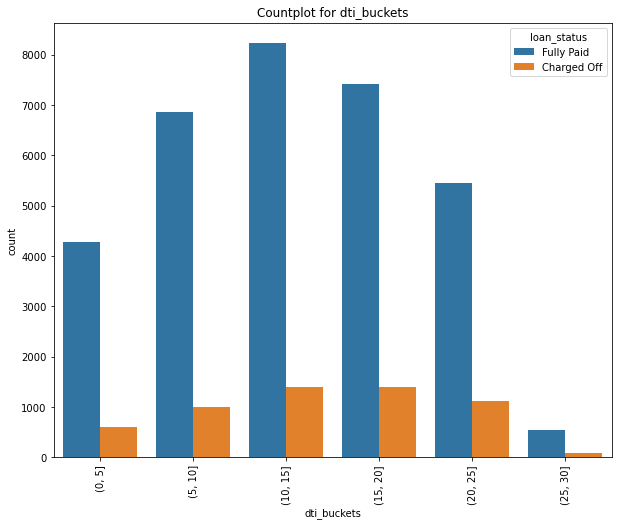

In [271]:
#now all the above columns are categorical
bucket_cols = ['annual_inc_buckets','loan_amnt_buckets','funded_amnt_inv_buckets','installment_buckets','int_rate_buckets','open_acc_buckets','revol_util_buckets','total_acc_buckets','dti_buckets']

## Plotting countplots for all bucket columns
for i in bucket_cols:
    plt.figure(figsize = (10,8))
    sns.countplot(loan[i], hue =loan["loan_status"])
    plt.title("Countplot for "+i)
    plt.xticks(rotation=90)
    plt.show()
    

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

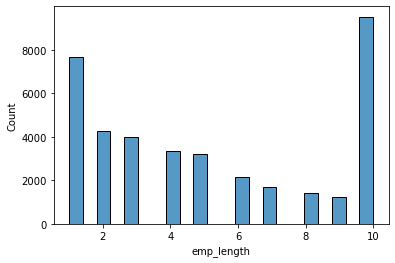

In [272]:
# plotting histplot for emp_length column:

sns.histplot(loan['emp_length'])

### Insights : As per observation from the above plots
1. annual_inc_buckets : annual income of borrowers are mostly in the range of 25k to 75k, also we can see that there are high number of borrowers with annual income ranging between 125k to 145k
   Income groups in range of below 25k and 75k to 100K are pretty less and there are almost none in 100k to 125k range.
2. loan_amnt_buckets : most of the applicants have appplied for loan in range of 5k to 10k, followed by upto 5k and 10k-15k, very few people apply for loan beyomg 20k
3. funded_amnt_inv_buckets : amount actually funded for loan is mostlyin range of 5k to 10k, followed by upto 5k and 10k-15k, the distribution is similar corresponding to the loan amount applied for 
4. installment_buckets : it's highest in the range of 150-300, followed by 0-150 and 300-400, we can assume the installment distribution depends on the distribution of funded_amnt_inv
5. int_rate_buckets : interest is mostly in the range of 5%-15%
6. open_acc_buckets : percentage of borrowers greater than 10 open accounts is quite less
7. revol_util_buckets : looks like there is an uniform distribution of data ----> higher the revol_util charge offs increases
8. total_acc_buckets : majority of the borrowers have around 0 to 40 accounts
9. dti_buckets : distribution is quite uniform expect 25 -30 range which might be due to the outliers which we had not treated earlier - 
10. emp_length : most of the borrowers are long term employees (10 & above) followed by 0 to 1 year exp. We can assume that highly experienced employees get more loans as their annual income is higher and also very less experienced employees get more loans approved as their employment term is more so chances of loan repayment increase

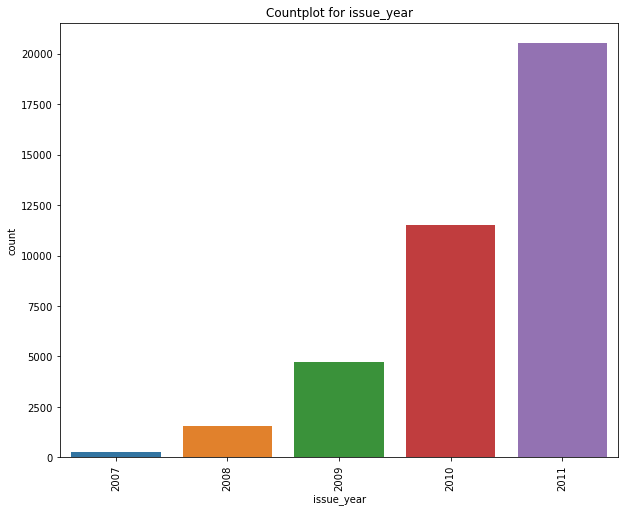

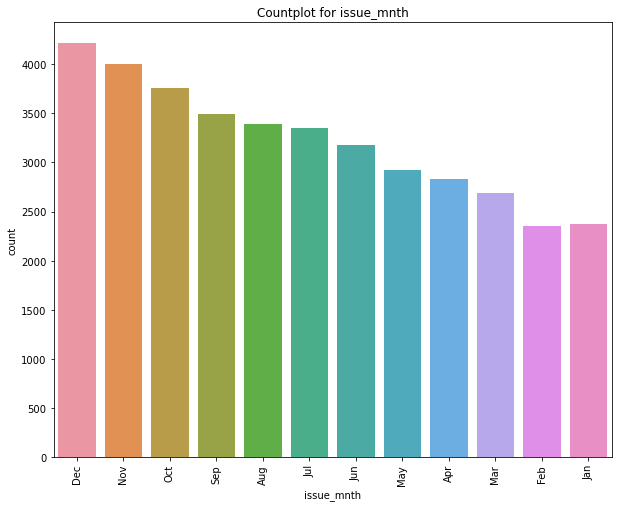

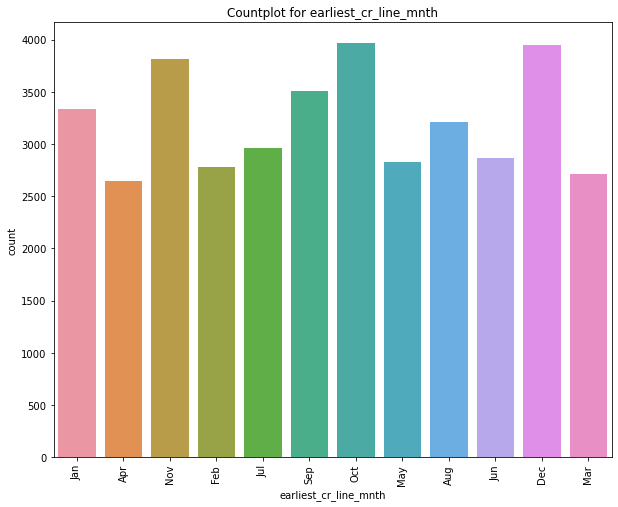

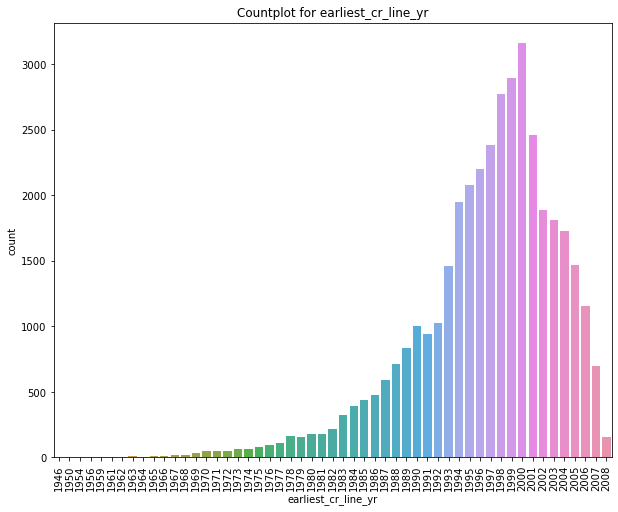

In [273]:
# plotting countplot plots for issue_mnth & issue_year
for i in ['issue_year',"issue_mnth",'earliest_cr_line_mnth','earliest_cr_line_yr']:
    plt.figure(figsize = (10,8))
    sns.countplot(loan[i])
    plt.title("Countplot for "+i)
    plt.xticks(rotation=90)
    plt.show()

### Insights : 
1. issue_year : maximum loans were issued in 2011, which might be due to the data set having high emp_length in 10 & above
2. issue_mnth : December shows high approval of loans, might be due to holiday season the loans are not verified and approved, which can also explain the high number of non-verified records seen earlier
3. earliest_cr_line_mnth : the records are higher in Nov, Oct, Dec
4. earliest_cr_line_yr : most credit lines were opened in 1998 to 2001 , which might be due to the data set having high emp_length in 10 & above

## Bivariate analysis

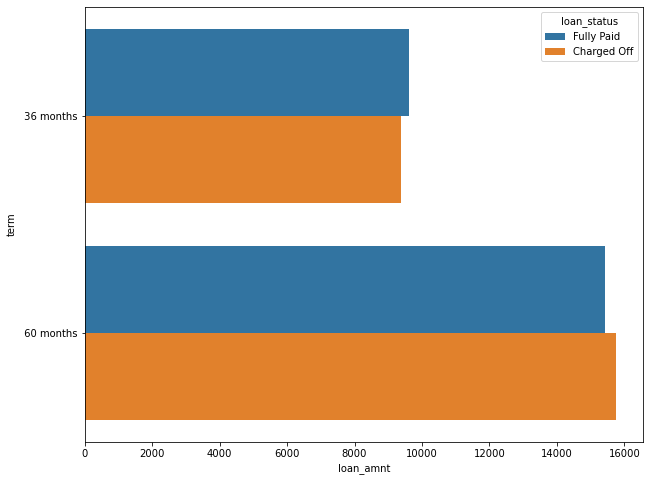

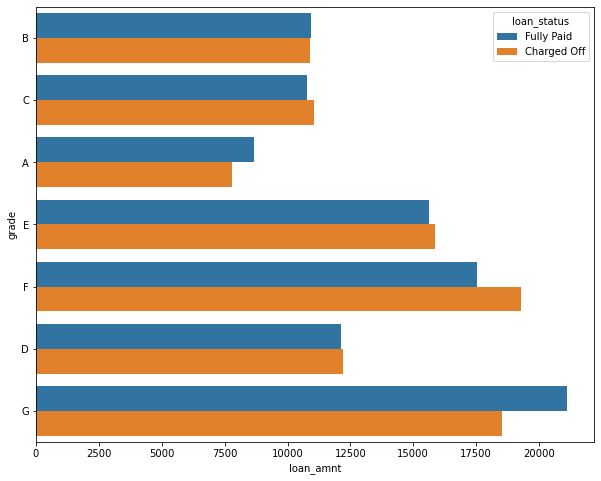

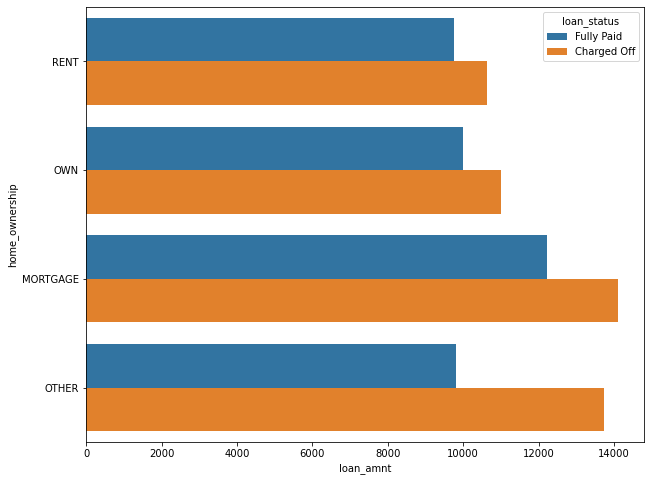

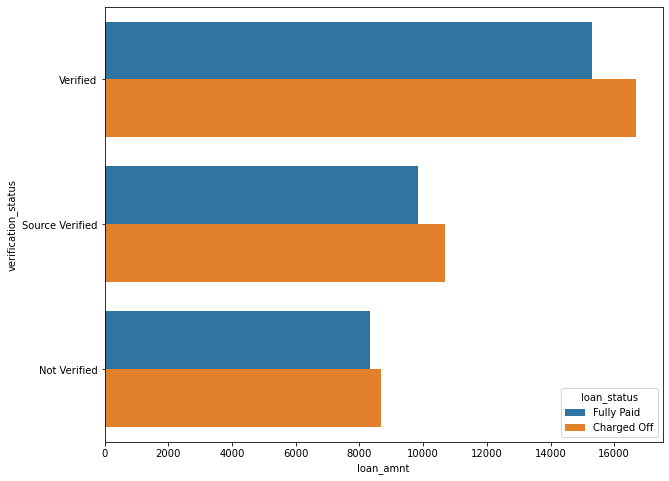

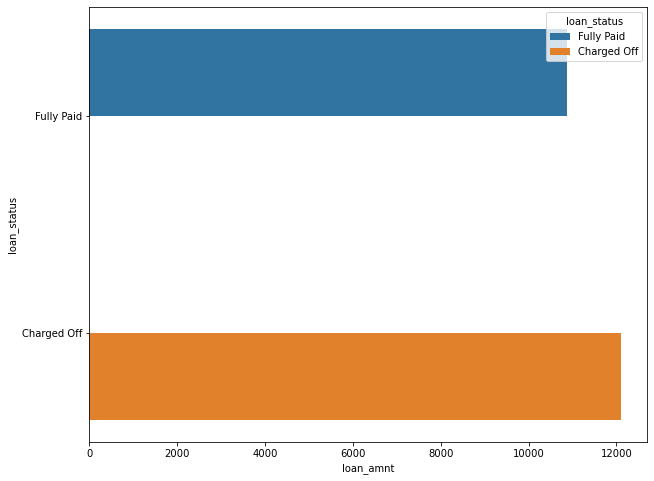

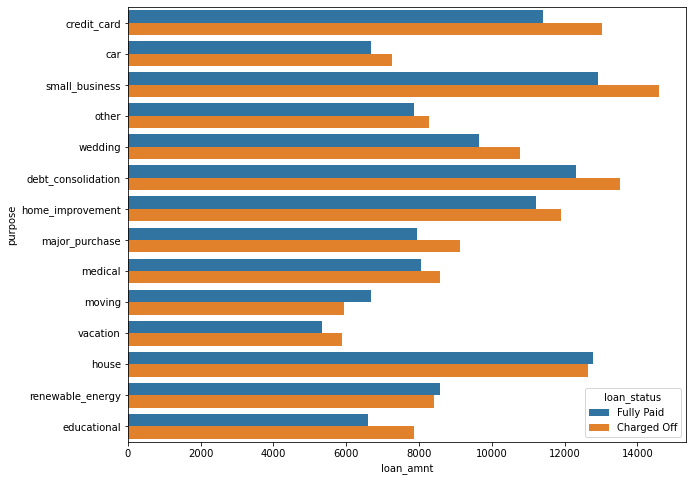

In [274]:
# removing sub_grade from cat_cols list as we had converted it to int by extracting only the numeric data
cat_cols.remove('sub_grade')

# analyizing the influence of loan amount with other cat_cols for both loan status
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot( x = loan['loan_amnt'] , y = loan[i] , hue = loan['loan_status'] , ci = None)

Insight : 
1. Grade 'G' & 'F' applicants requested max loan amount. Also, maximum defaulters are Grade 'F' applicants
2. Maximum defaulters are higher for applicants with home ownership as MORTGAGE or OTHER
3. Loan amount requested for Small Business is highest and also have high defaulters followed by Credit Card & Debt Consolidation


# analyizing the influence of int_rate with other cat_cols for both loan status
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot( x = loan['int_rate'] , y = loan[i] , hue = loan['loan_status'], ci = None)

Insights:
1. Defaulters are higher for higher interest rate accross all categories


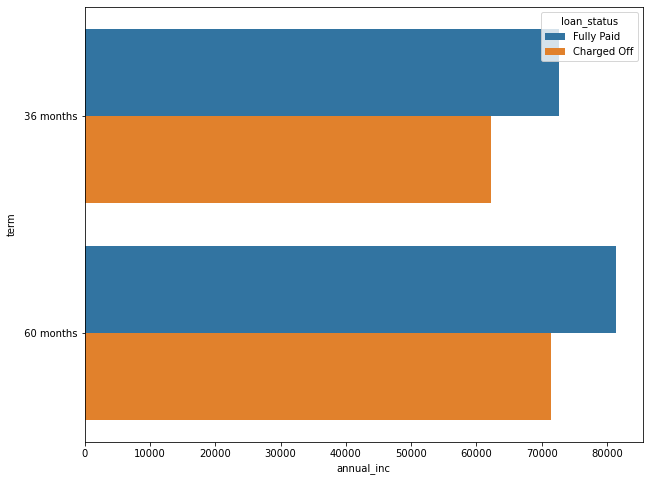

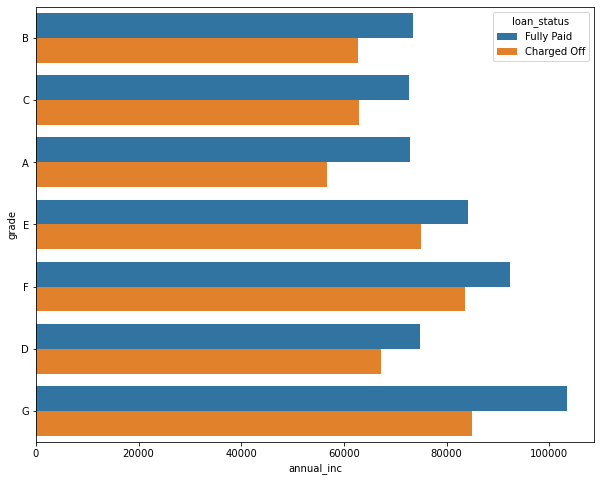

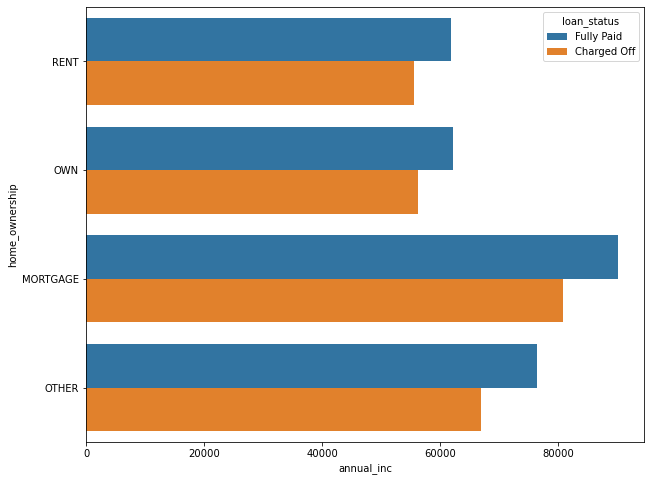

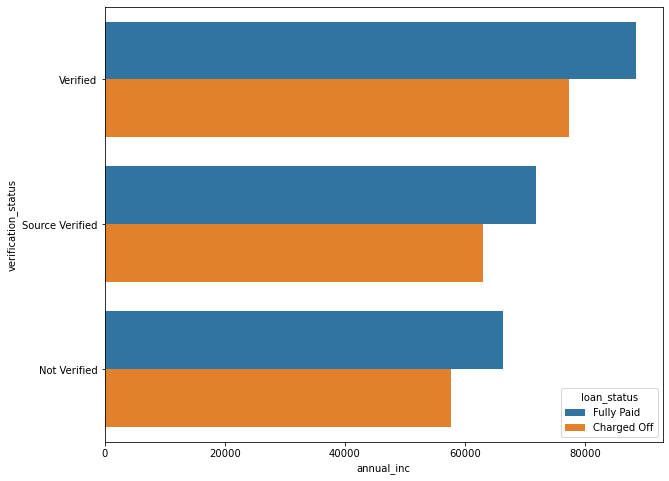

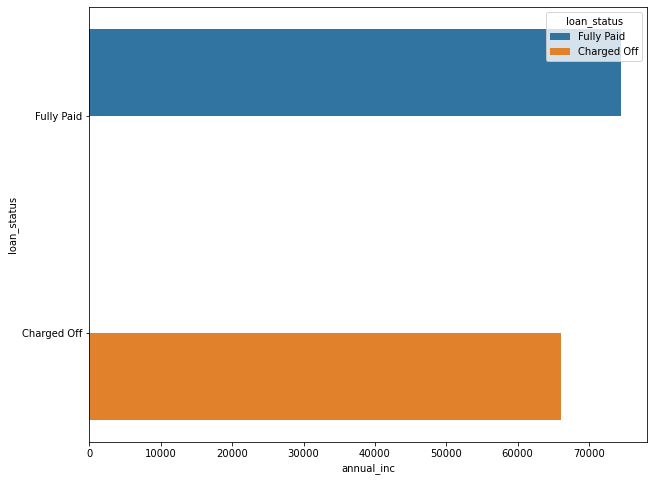

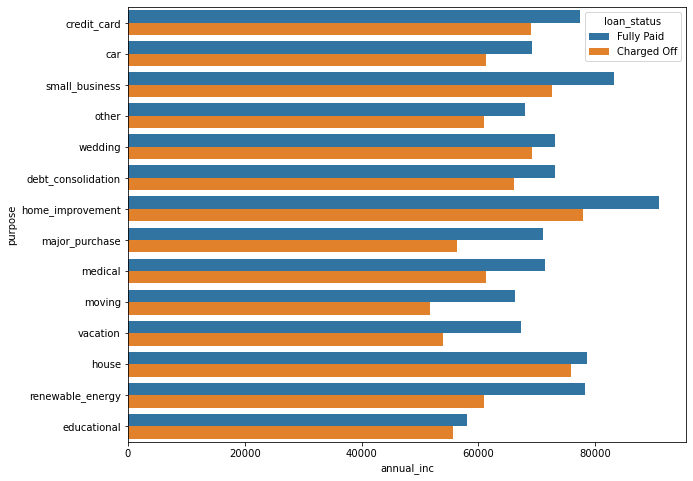

In [276]:
# analyizing the influence of annual income with other cat_cols for both loan status
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot( x = loan['annual_inc'] , y = loan[i] , hue = loan['loan_status'], ci = None)

Insights:
1. Higher the annual Income chances of defaulting is less

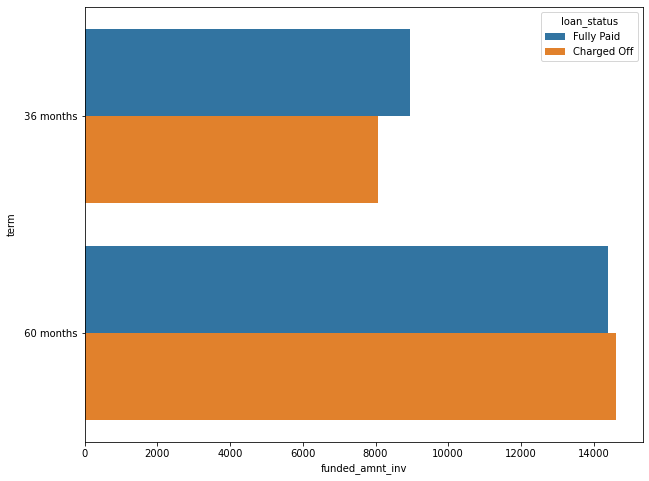

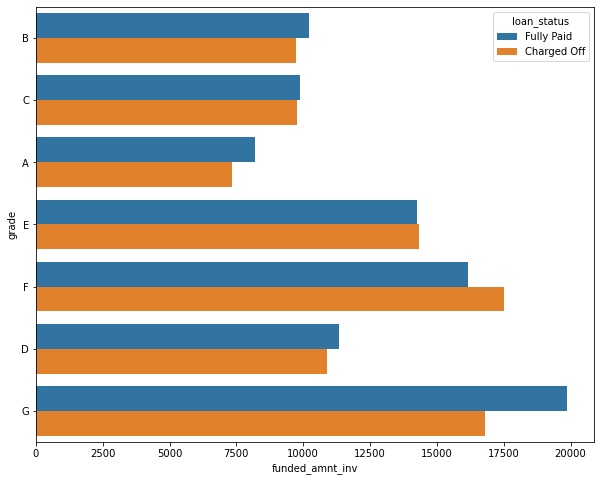

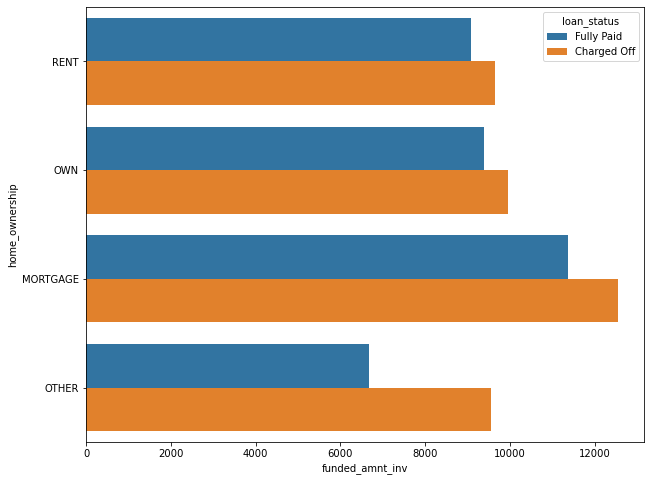

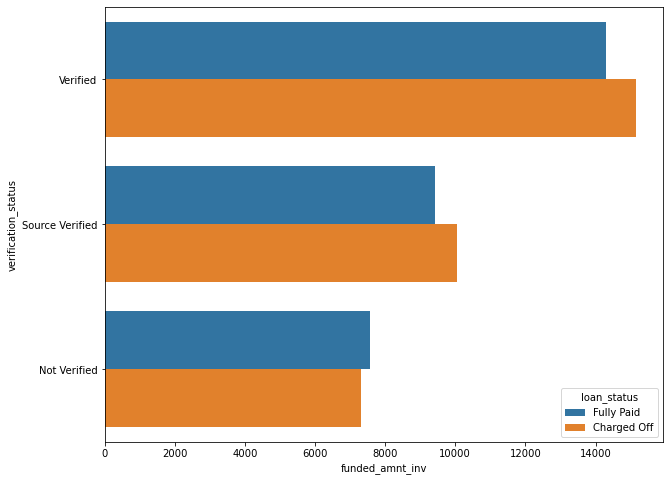

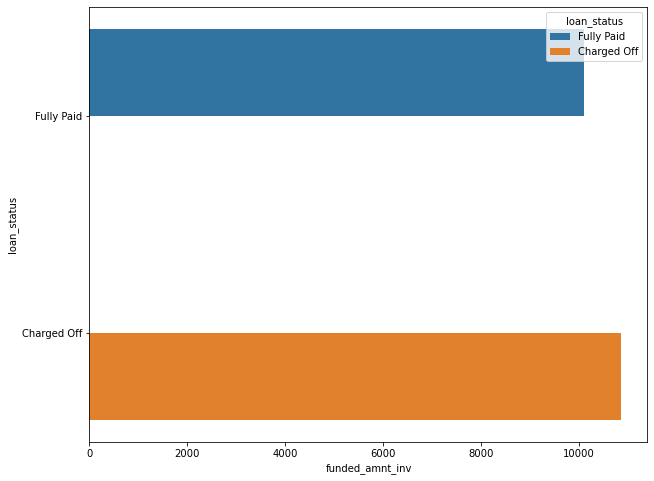

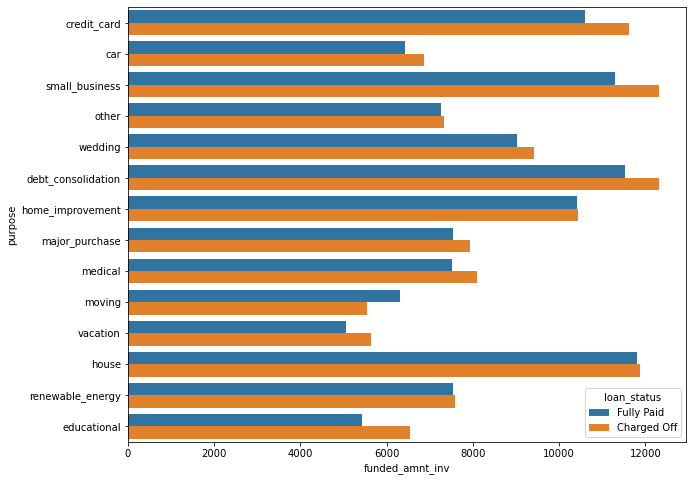

In [277]:
# analyizing the influence of funded amount investor with other cat_cols for both loan status
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot( x = loan['funded_amnt_inv'] , y = loan[i] , hue = loan['loan_status'], ci = None)

Insights: Funded amount shows a similar trend for defaulters as that based on loan amount 


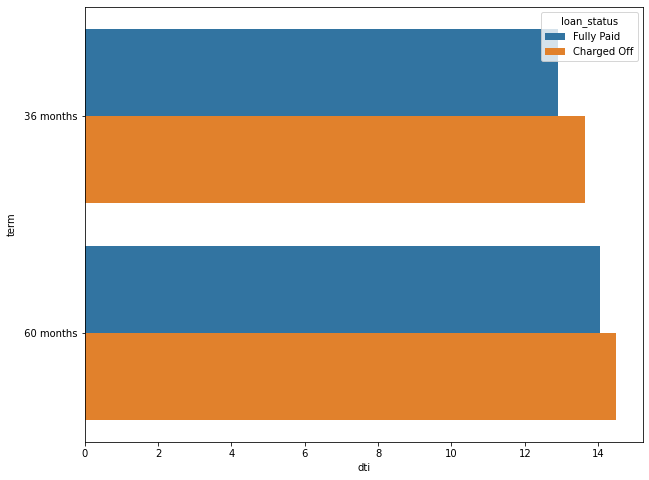

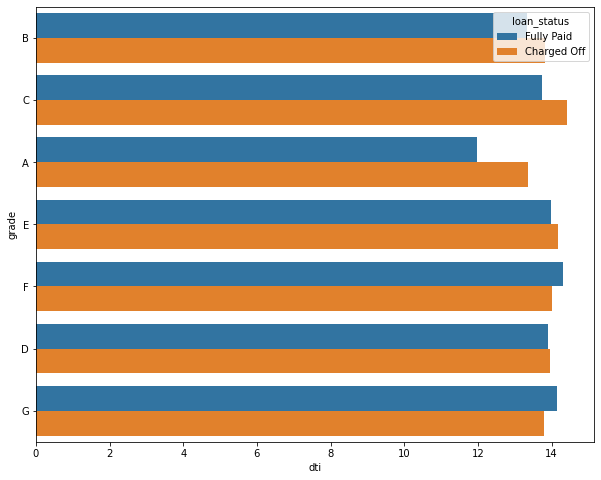

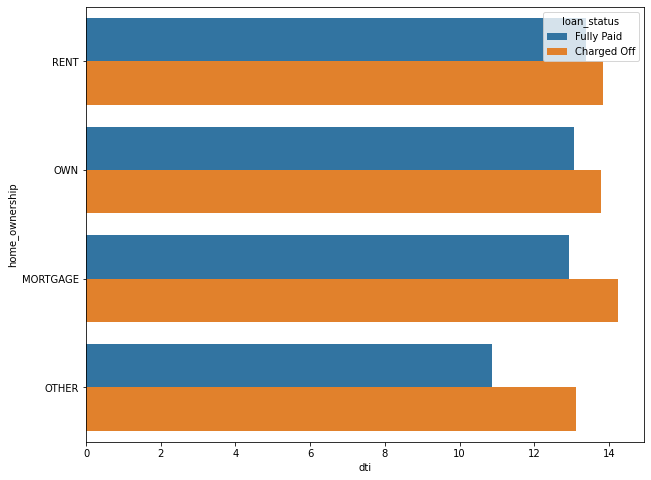

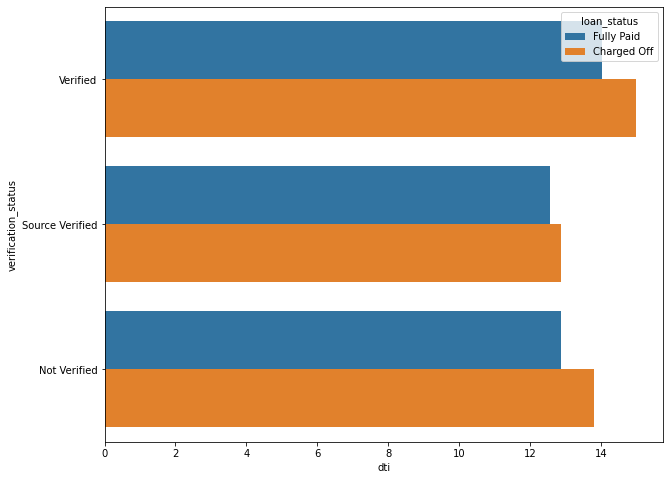

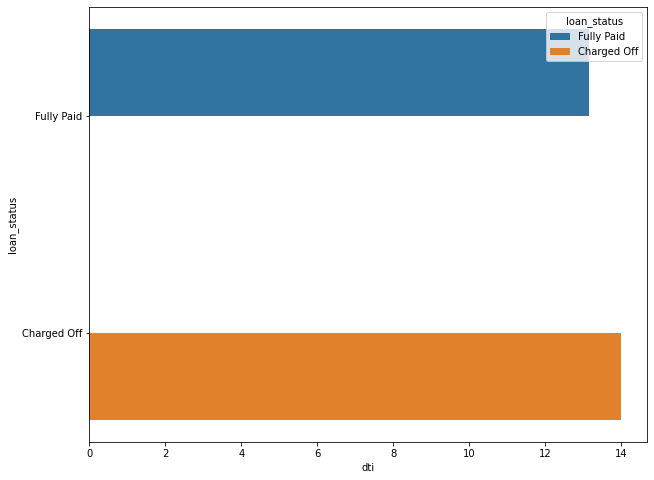

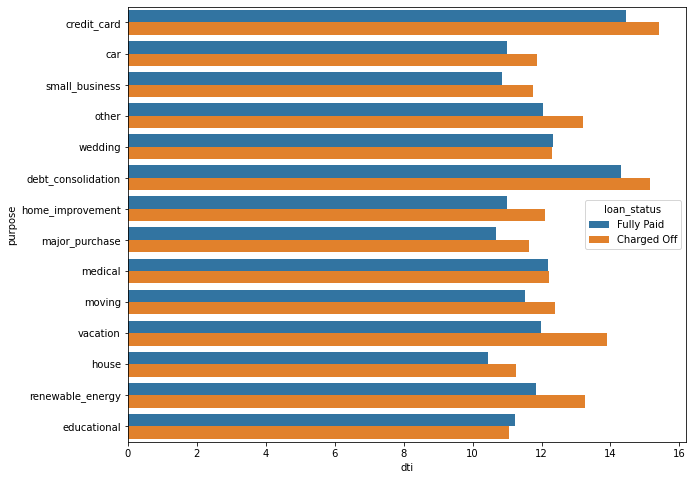

In [278]:
# analyizing the influence of dti with other cat_cols for both loan status
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot( x = loan['dti'] , y = loan[i] , hue = loan['loan_status'], ci = None)

Insight : Higher the dti , higher is the chance of defaulting 

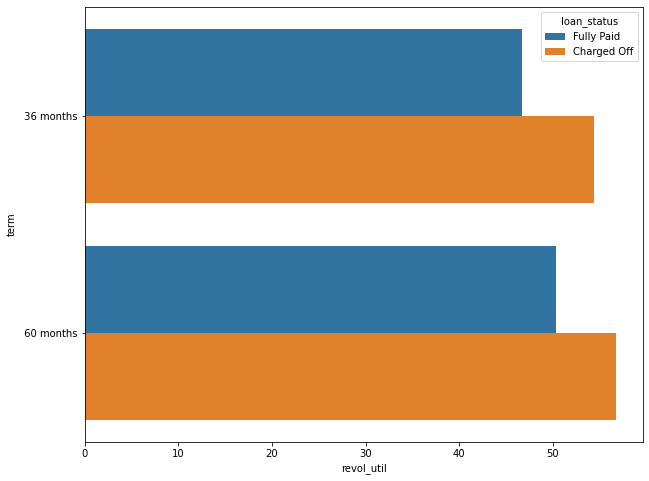

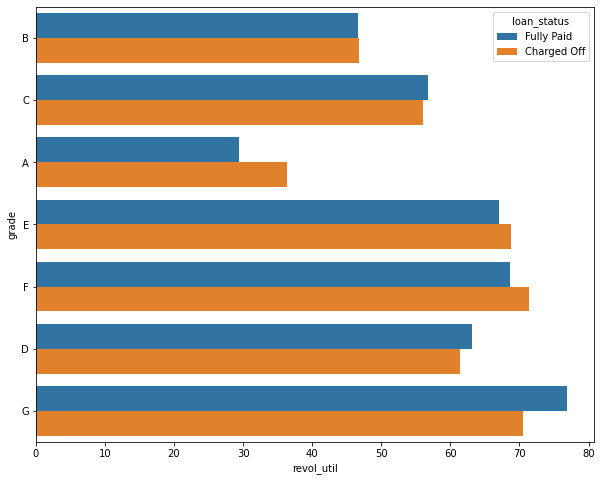

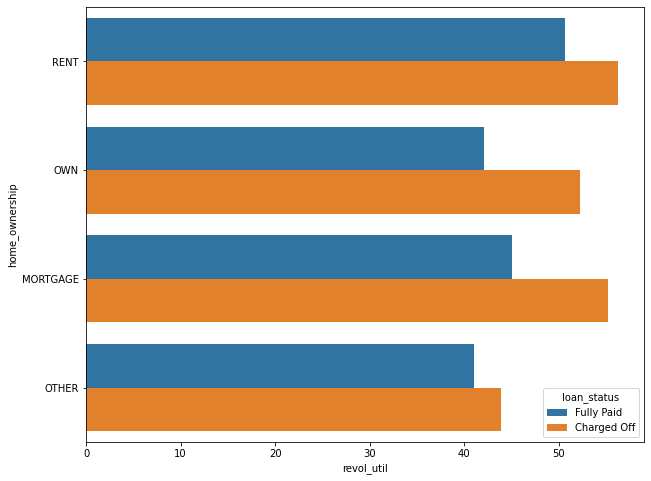

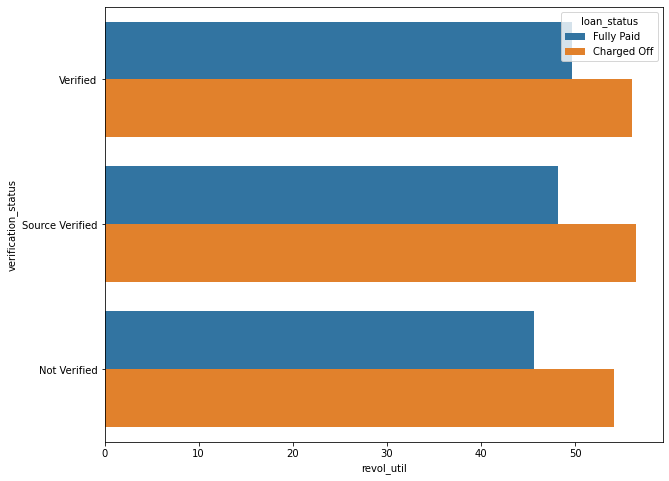

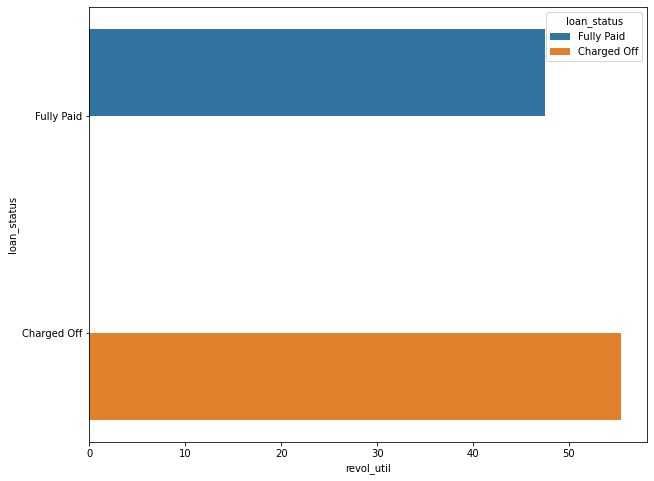

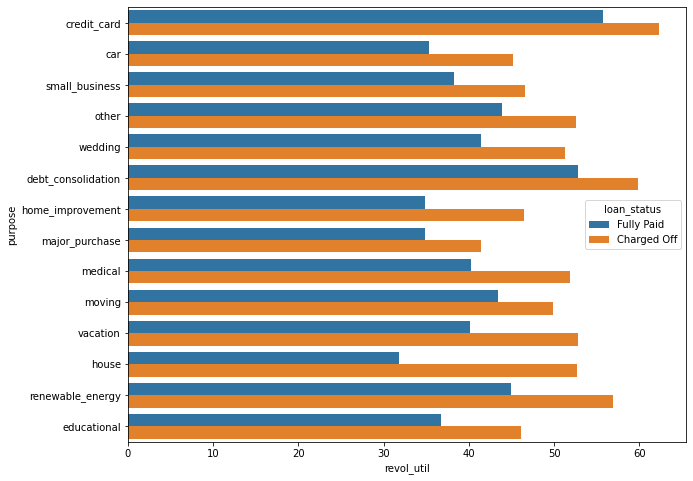

In [279]:
# analyizing the influence of revol_util with other cat_cols for both loan status
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot( x = loan['revol_util'] , y = loan[i] , hue = loan['loan_status'], ci = None)

Insight : Higher the revol util, higher is the chance of defaulting

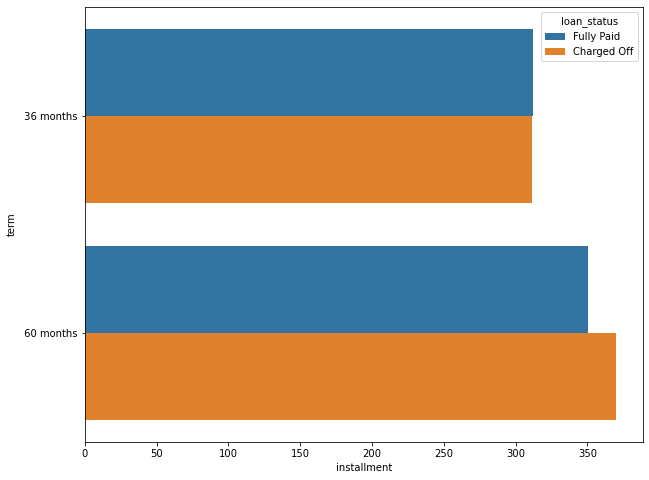

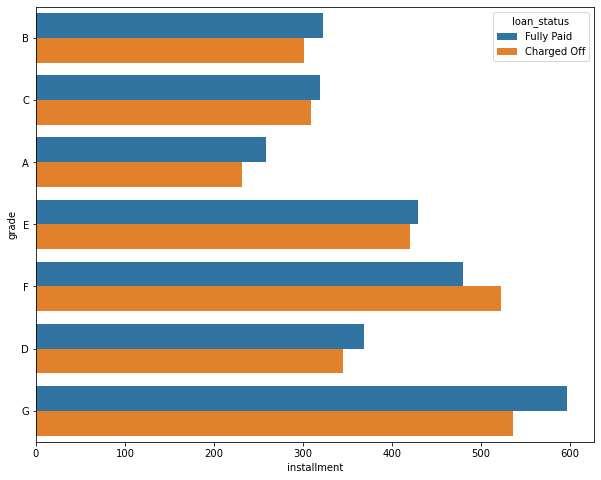

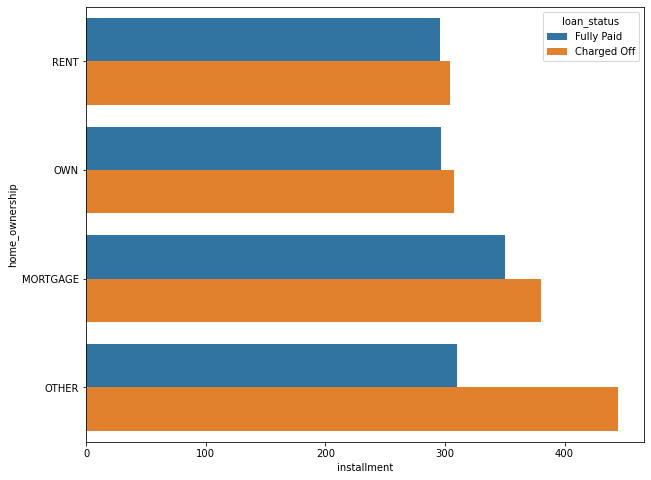

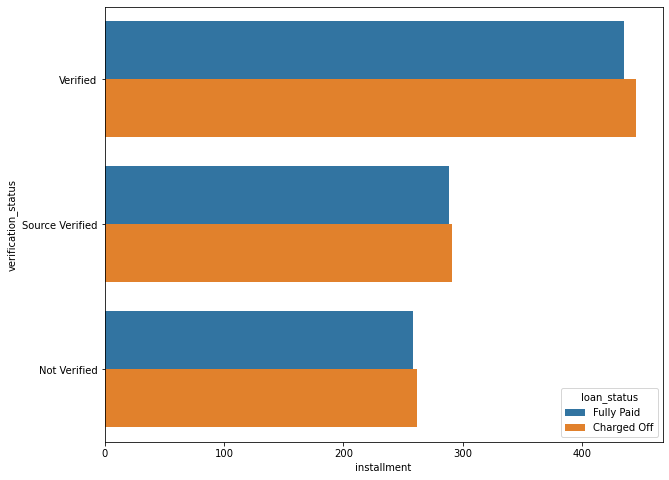

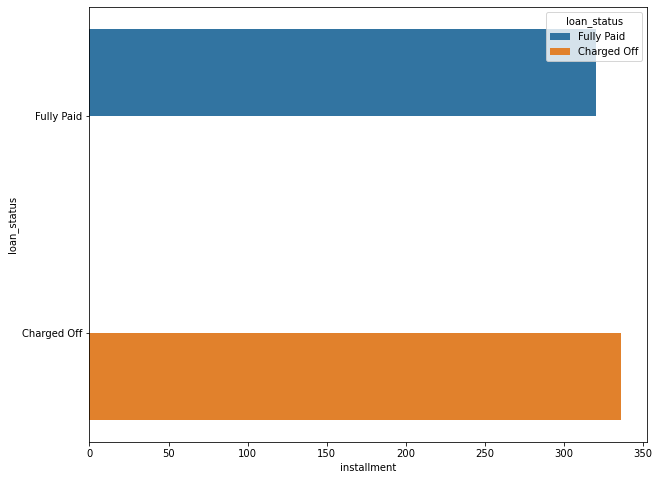

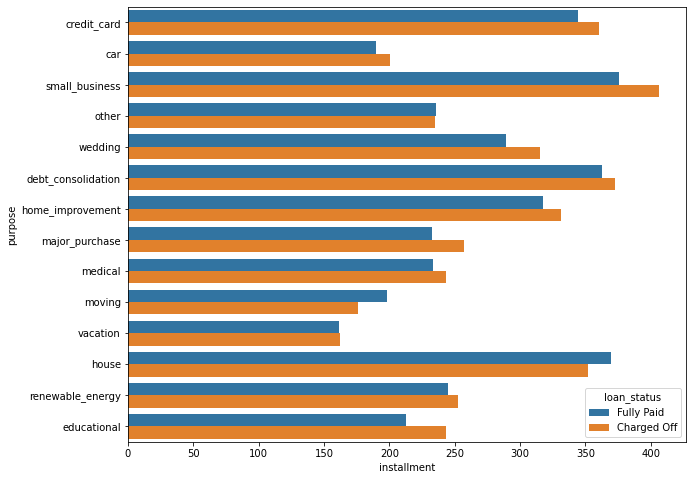

In [280]:
# analyizing the influence of installment with other cat_cols for both loan status
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot( x = loan['installment'] , y = loan[i] , hue = loan['loan_status'], ci = None)

Insights: installment shows a similar trend for defaulters as that based on loan amount  & Funded amount

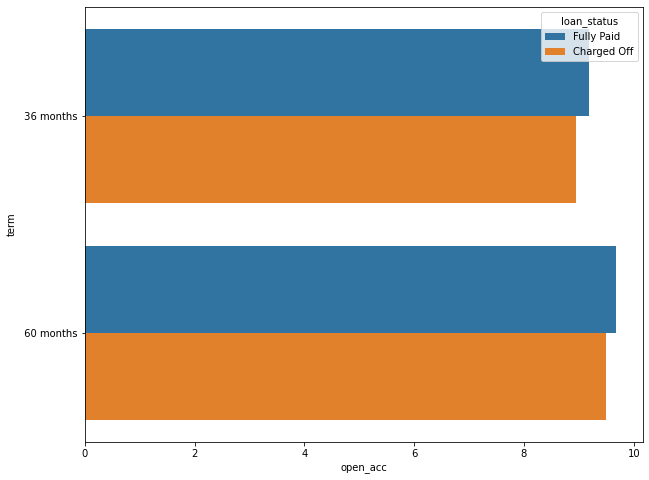

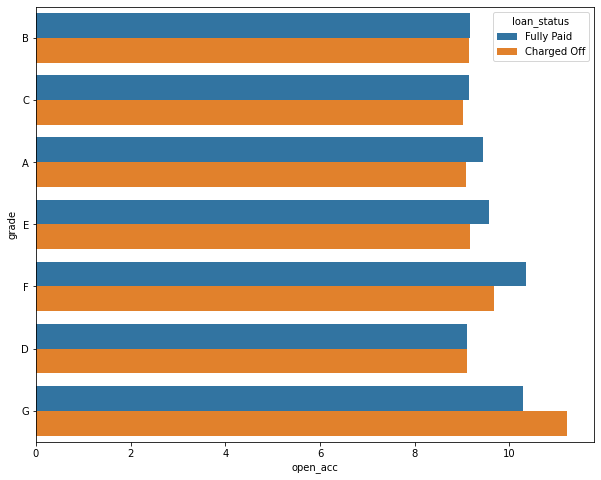

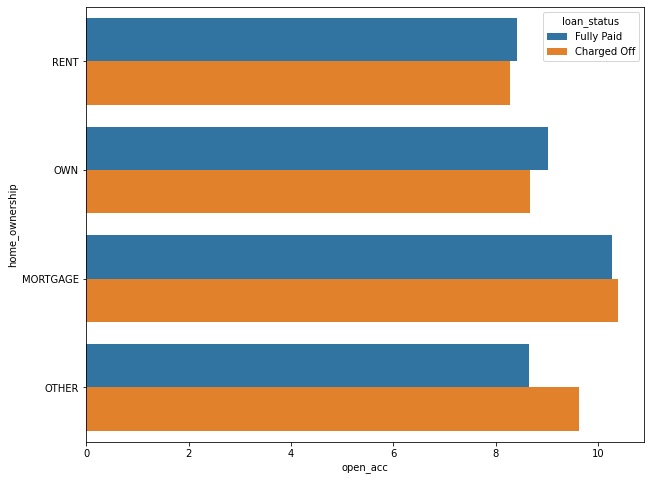

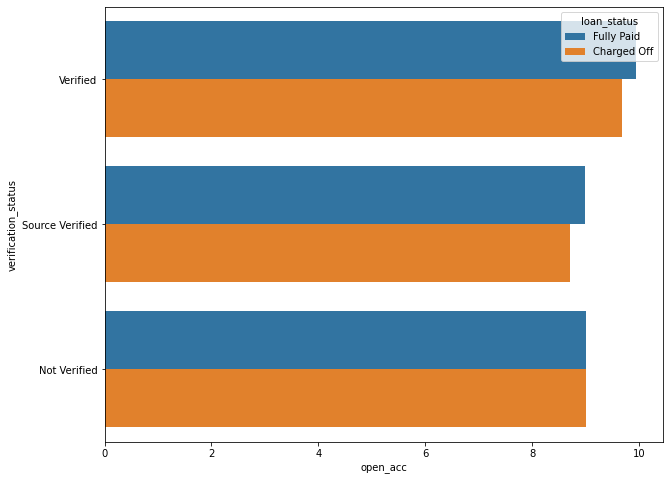

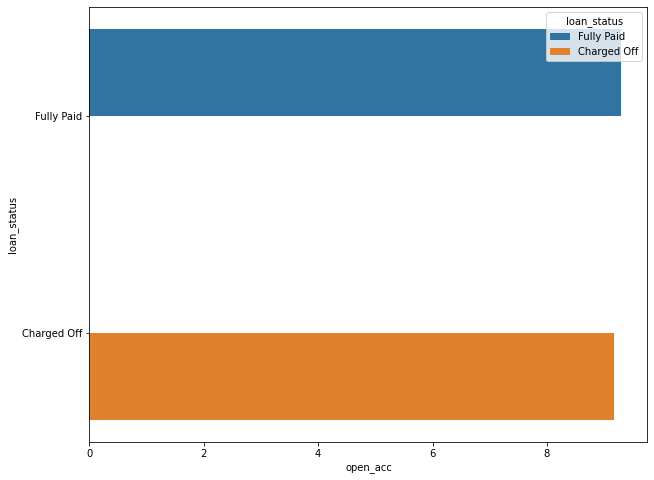

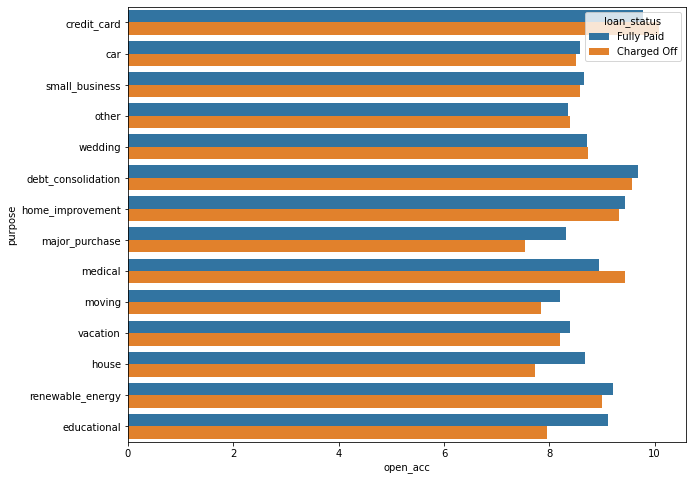

In [282]:
# analyizing the influence of open account with other cat_cols for both loan status
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot( x = loan['open_acc'] , y = loan[i] , hue = loan['loan_status'], ci = None)

Insight : Grade G with has higher defaulter with max open accounts
    

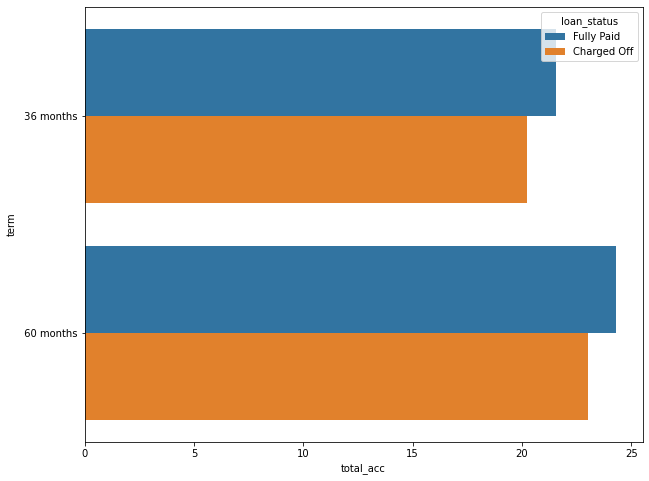

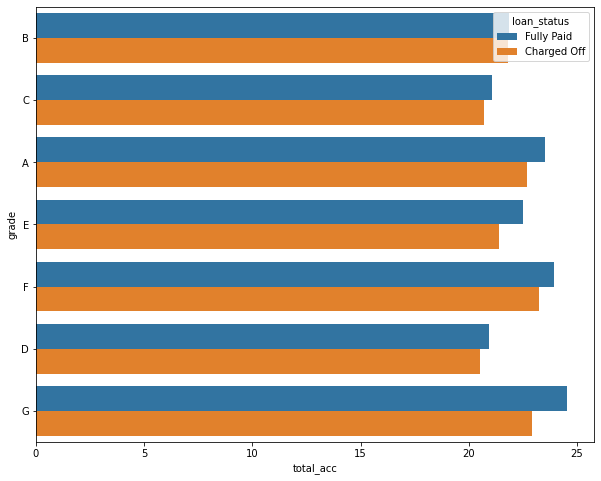

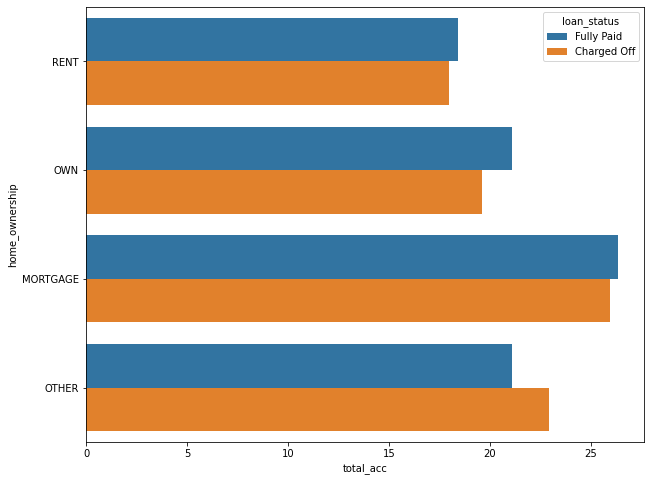

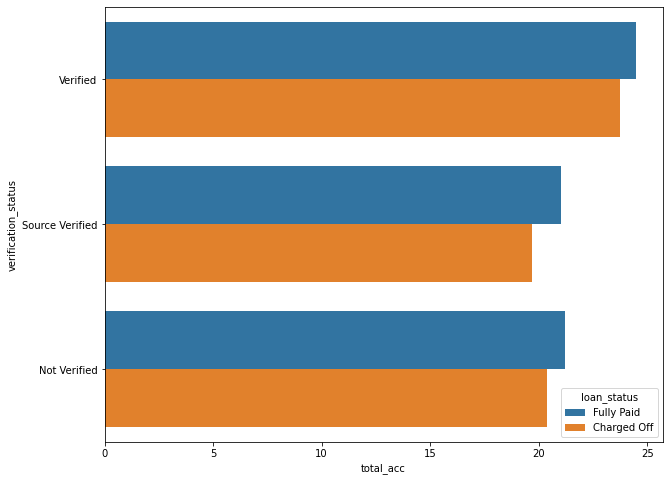

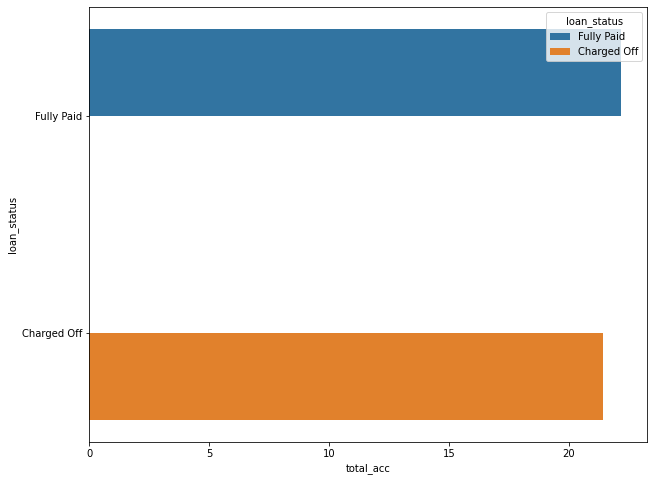

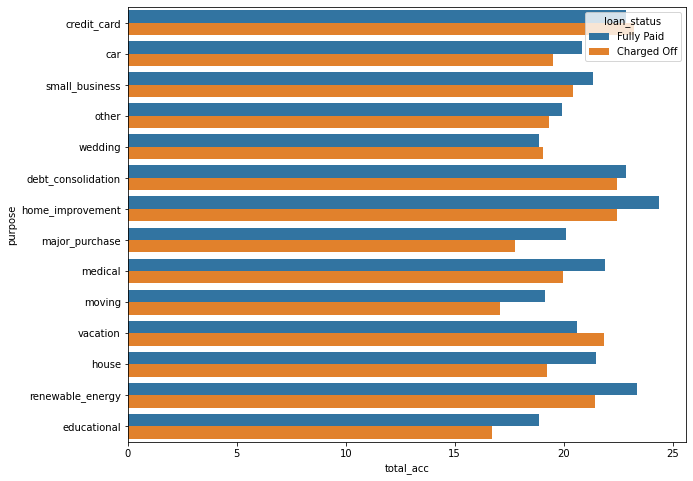

In [283]:
# analyizing the influence of total accounts with other cat_cols for both loan status
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot( x = loan['total_acc'] , y = loan[i] , hue = loan['loan_status'], ci = None)

Insight : No such trend is observed , although in general more the total accounts less chance of defaulting

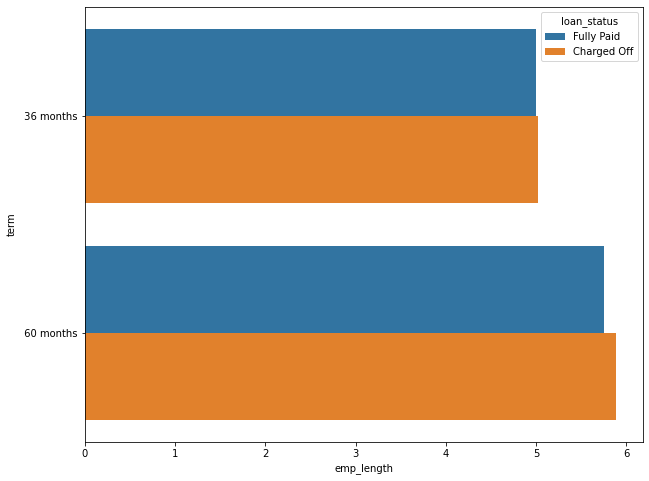

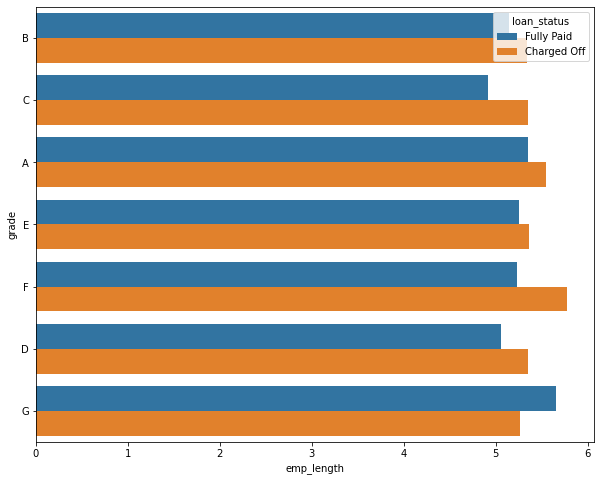

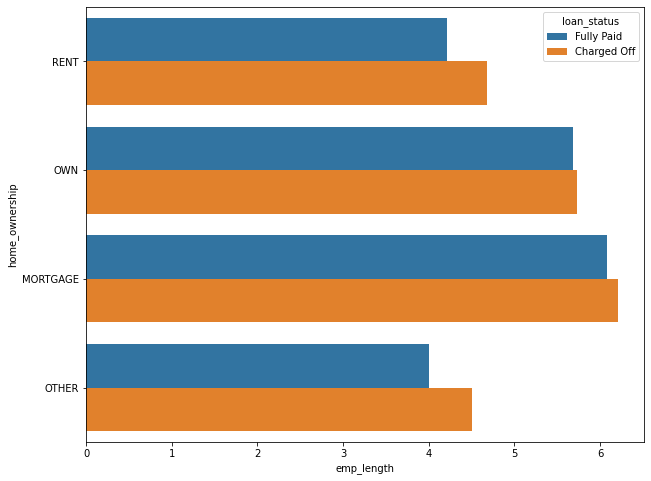

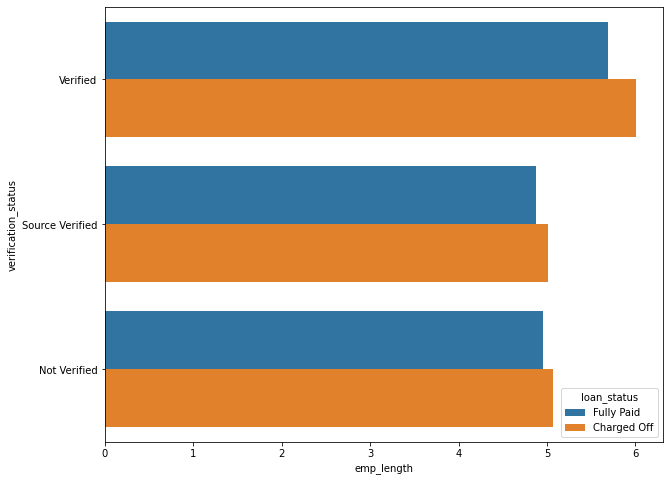

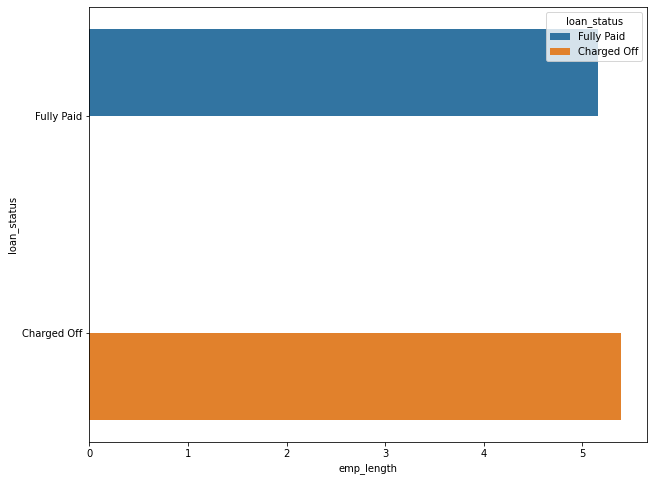

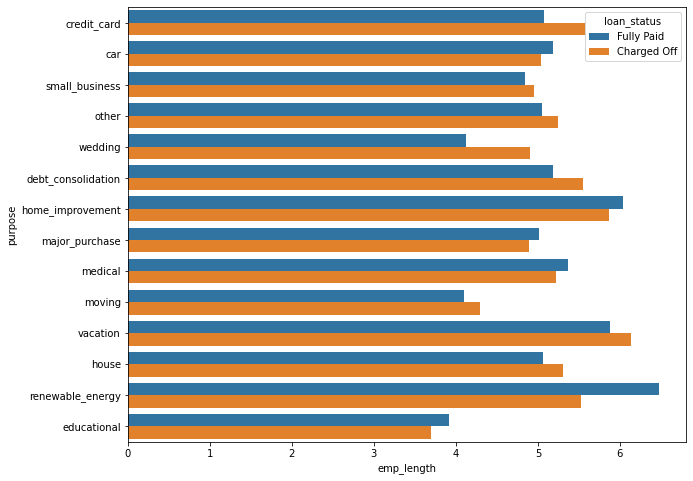

In [284]:
# analyizing the influence of emp_length with other cat_cols for both loan status
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot( x = loan['emp_length'] , y = loan[i] , hue = loan['loan_status'], ci = None)

Insights: installment shows a similar trend for defaulters as that based on loan amount, installment & Funded amount. 
Long term employees with purpose as Credit Card shows a high default rate

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

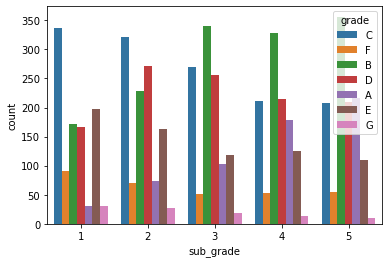

In [285]:
# analyizing the influence of subgrade with loan status Charged Off
sns.countplot(x = 'sub_grade', hue = 'grade',data = loan[loan["loan_status"] == 'Charged Off'])


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

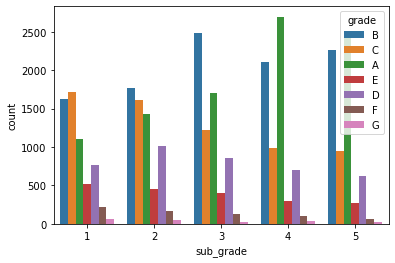

In [286]:
sns.countplot(x = 'sub_grade', hue = 'grade',data = loan[loan["loan_status"] == 'Fully Paid'])

Insight : B6 has higher Charged Off count

<AxesSubplot:xlabel='issue_year', ylabel='count'>

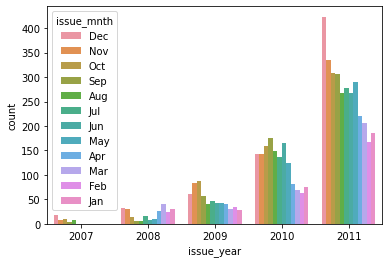

In [287]:
# analyizing the influence of issue year and issue month with loan status 
sns.countplot(x = 'issue_year', hue = 'issue_mnth',data = loan[loan["loan_status"] == 'Charged Off'])

<AxesSubplot:xlabel='issue_year', ylabel='count'>

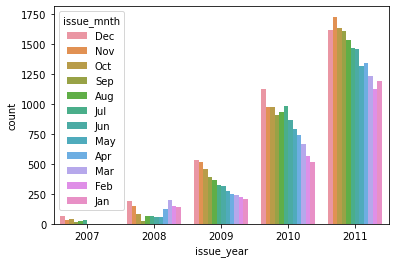

In [288]:
sns.countplot(x = 'issue_year', hue = 'issue_mnth',data = loan[loan["loan_status"] == 'Fully Paid'])

Insight : Maximum charged off are the loans that were issued in Dec2011. This might be as seen earlier most loans were issued in 2011 Dec

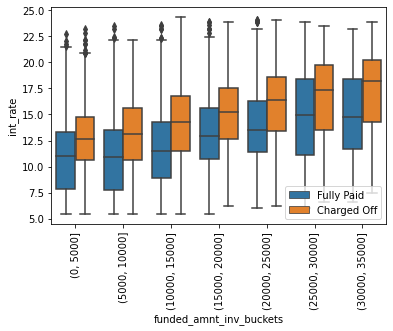

In [289]:
# Analysing the distribution of interest rate for funded amounts for both loan status
sns.boxplot(data =loan,y ='int_rate', x ='funded_amnt_inv_buckets', hue ='loan_status')
plt.xticks(rotation = 90)
plt.legend(loc = 'lower right')
plt.show()

Insight : Interest Rate for Charged Off Loans are quite high compared to Fully Paid loans

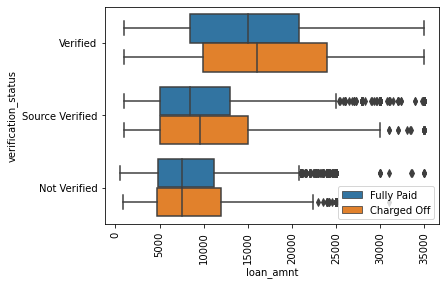

In [290]:
# Analysing the distribution of verification status for loan amounts for both loan status
sns.boxplot(data =loan,y ='verification_status', x ='loan_amnt', hue ='loan_status')
plt.xticks(rotation = 90)
plt.legend(loc = 'lower right')
plt.show()

Insight : Loan status is verified and loan amount is 15k  & above shows a higher Charged Off  

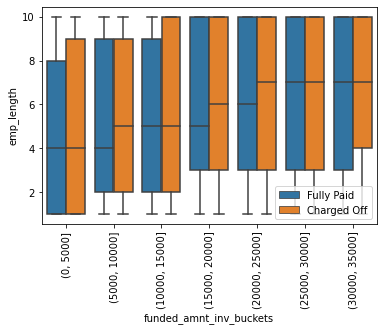

In [291]:
# Analysing the distribution of emp_length for funded amounts for both loan status
sns.boxplot(data =loan,y ='emp_length', x ='funded_amnt_inv_buckets', hue ='loan_status')
plt.xticks(rotation = 90)
plt.legend(loc = 'lower right')
plt.show()

Insight : Defaulters are pretty high for funded amount between 10k to 15k and employee length 10+years

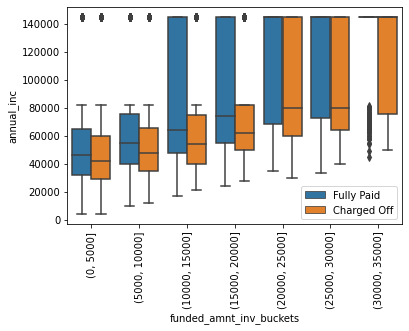

In [292]:
# Analysing the distribution of annual_inc for funded amounts for both loan status
sns.boxplot(data =loan,y ='annual_inc', x ='funded_amnt_inv_buckets', hue ='loan_status')
plt.xticks(rotation = 90)
plt.legend(loc = 'lower right')
plt.show()

Insights : Chances of defaulting is higher when the funded amount is in range of 20K to 35K and annual income is between 75k to 140k

### Multivariate Analysis

In [293]:
# Creating a new column loan rank with 0 for Charged Off and 1 for Fully Paid status
loan['loan_rank'] = loan['loan_status'].apply(lambda x : 1 if x == 'Fully Paid' else 0 )

<AxesSubplot:>

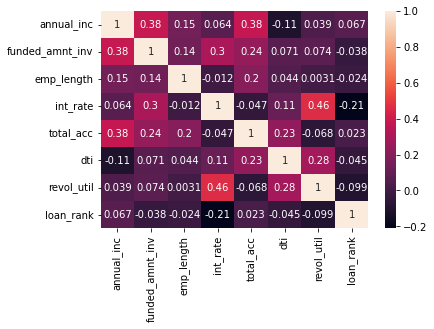

In [294]:
# Plotting the correlation of continuous columns w.r.t to loan rank
sns.heatmap(loan[["annual_inc","funded_amnt_inv","emp_length","int_rate","total_acc","dti","revol_util",'loan_rank']].corr(),annot=True)

Insight :
1. Higher the funded amount, interest rate, dti, revol util and employee length , higher are the chances of loan defaulting
2. Total accounts & Annual income are slight positively correlated to Loan status

### High Level Summary:
1. With the available dataset, high percentage of data is fully paid compared to charged off.   
2. home_ownership : Maximum Charged Off correspond to MORTGAGE & RENT(though looking at the graph MORTGAGE chargedoff percentile seems higher
3. verification_status: Most of the loan approved falls under Not_Verifed category
4. purpose : debt_consolidation appears to be the main purpose for the applicants, also charged off is higher
5. maximum loans were issued in 2011, which might be due to the data set having high emp_length in 10 & above
6. In general more the total accounts shows less chance of defaulting
7. Dti and Revol_util displays a positive correlation with respect to getting Fully Paid or Charged Off
8. Loan status is verified and loan amount is 15k  & above shows a higher Charged Off  
                                                                      


## Final Conclusion:
Based on above analysis below are some of the attributes (but not limited to) that can help identify defaulters:
1. Maximum defaulters are higher for applicants with home ownership as MORTGAGE or OTHER
2. Loan amount requested for Small Business is highest and also have high defaulters followed by Credit Card & Debt Consolidation
3. Defaulters are higher for higher interest rate accross all categories
4. Defaulters are pretty high for funded amount between 10k to 15k and employee length 10+years
5. Chances of defaulting is higher when the funded amount is in range of 20K to 35K and annual income is between 75k to 140k
6. Long term employees with purpose as Credit Card shows a high default rate
7. Higher the dti & revol util, higher are the chances of defaulting